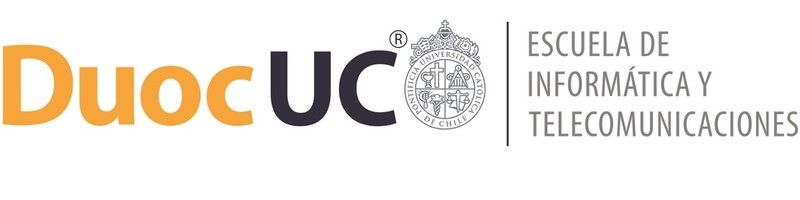

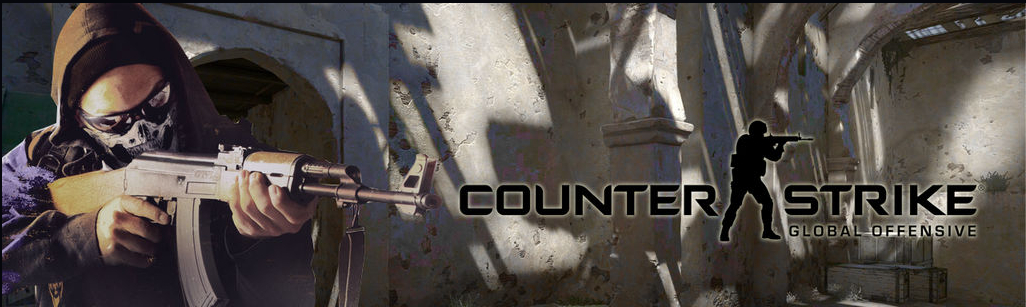

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
* Gabriel Ramirez
* Alexander Monares
* Fabián González

Docente: Italo Bonnet

Sección: MLY0100 - 006D

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

 CS:GO es un juego tipo shooter competitivo en el cual se forman partidas de dos equipos conformados por 5 jugadores cada uno. El equipo Terrorista tiene el objetivo de detonar una bomba en puntos especificos del mapa donde se juega la partida mientras que los Antiterroristas tienen la mision de evitar que el equipo rival plante dicha bomba o en dicho caso desactivarla.

  En el ultimo tiempo el juego ha tenido la mala fama de poseer una gran cantidad de jugadores toxicos que entorpecen la jugabilidad de las partidas y el entretenimu¿iento de los usuarios, esto proboca una mayor cantidad de frustracion a la hora de perder partidas.

  segun nuentras suposiciones la principal razon por la que un equipo gana una ronda de CSGO es por el equilibrio de habilidad entre sus integrantes mientras que aquellos equipos disparejos en habilidad y comuncacion tienden a jugar con menor sinergia debido a falta de estrategias entre otros muchos factores.

  Para esto vamos a usar las siguentes variables de interes

  - MatchId
  - RoundId
  - RoundWinner
  - TimeSurvived
  - RoundId
  - Internal Team Id
  - Match Assists
  - Match Kills
  - Match FlankKills
  - Match HeadShots
  - RLethalGrenadesThrown
  - RNonLethalGrenadesThrown

  El fin de este proyecto es dar nuestras visiones para demostrar los valores que pueden llegar a predecir la victoria de la partida, si es que nuestras suposiciones sobre la toxicidad del juego son correctas y cuales son las posibles soluciones para hacer de CSGO una experiencia mas grata para el videojugador.

In [1]:
#Cargar Librerias

import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
from seaborn import lmplot
from seaborn import boxplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


In [2]:
#conectarse a drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Cargar Datos (con cuenta gabriel.ramirezd5gmail.com)
url= '/content/drive/MyDrive/MachineLearning/archivoCSGO.csv'
df = pd.read_csv(url, sep=";")

print(df)


       Unnamed: 0         Map              Team  InternalTeamId  MatchId  \
0             600  de_inferno         Terrorist               1        4   
1             601  de_inferno         Terrorist               1        4   
2             602  de_inferno         Terrorist               1        4   
3             603  de_inferno         Terrorist               1        4   
4             604  de_inferno         Terrorist               1        4   
...           ...         ...               ...             ...      ...   
79152      123775   de_mirage  CounterTerrorist               2      511   
79153      123776   de_mirage  CounterTerrorist               2      511   
79154      123777   de_mirage  CounterTerrorist               2      511   
79155      123778   de_mirage  CounterTerrorist               2      511   
79156      123779   de_mirage  CounterTerrorist               2      511   

       RoundId RoundWinner MatchWinner  Survived  AbnormalMatch  ...  \
0            1 

<ipython-input-3-fdf6bf59dffb>:3: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, sep=";")


In [4]:
#Cargar Datos
url= '/content/drive/MyDrive/machine learning/archivoCSGO.csv'
df = pd.read_csv(url, sep=";")

print(df)


FileNotFoundError: ignored

In [ ]:
#Cuadricula de datos (filas, columnas)
df.shape

In [ ]:
#Descripcion de columnas
df.columns

In [ ]:
#informacion de los tipos de datos de cada columna
df.info()

In [ ]:
#tabla
df.head()

In [ ]:
#DESCRIBIR DATOS
df.describe()

In [ ]:
#estadistica descriptiva de los datos
df.describe().T

In [ ]:
#datos faltantes o nulos
df.isna().sum()

## Fase 2: Data Understanding


In [56]:
# CALCULO DE LA DESVIACION ESTANDAR  DE TODOS LOS DATOS

df.std()

<ipython-input-56-83db4b7e2ebc>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


InternalTeamId                    0.500003
MatchId                         149.552937
RoundId                           7.432717
MatchWinner                       0.499053
Survived                          0.490608
PrimaryAssaultRifle               0.464120
PrimarySniperRifle                0.279801
PrimaryHeavy                      0.075498
PrimarySMG                        0.082379
PrimaryPistol                     0.415448
RoundKills                        0.881808
RoundAssists                      0.385608
RoundHeadshots                    0.578851
RoundFlankKills                   0.320646
RoundStartingEquipmentValue    2111.287720
TeamStartingEquipmentValue     9743.166727
MatchKills                        0.151098
MatchFlankKills                   0.130469
MatchAssists                      1.824044
MatchHeadshots                    0.147580
Team_encoded                      0.500003
RoundWinner_encoded               1.000006
RoundWinner_scaled                0.500003
Team_scaled

In [57]:
#CALCULO DE LA VARIANZA

df.var()

<ipython-input-57-0a494f727c59>:3: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()


InternalTeamId                 2.500032e-01
MatchId                        2.236608e+04
RoundId                        5.524529e+01
MatchWinner                    2.490537e-01
Survived                       2.406965e-01
PrimaryAssaultRifle            2.154074e-01
PrimarySniperRifle             7.828879e-02
PrimaryHeavy                   5.699979e-03
PrimarySMG                     6.786227e-03
PrimaryPistol                  1.725974e-01
RoundKills                     7.775845e-01
RoundAssists                   1.486932e-01
RoundHeadshots                 3.350684e-01
RoundFlankKills                1.028140e-01
RoundStartingEquipmentValue    4.457536e+06
TeamStartingEquipmentValue     9.492930e+07
MatchKills                     2.283074e-02
MatchFlankKills                1.702213e-02
MatchAssists                   3.327136e+00
MatchHeadshots                 2.177988e-02
Team_encoded                   2.500031e-01
RoundWinner_encoded            1.000013e+00
RoundWinner_scaled             2

Match


In [58]:
#Contador de partidas

counter = 0
count_10 = 0

for index, row in df.iterrows():
    counter += 1

    if counter == 10:
        count_10 += 1
        counter = 0

print("En el dataset se encuentran", count_10, "partidas de csgo.")

En el dataset se encuentran 7915 partidas de csgo.


In [59]:
#MODA DE PARTIDAS
moda_matchWinner = df['MatchWinner'].mode()

if any(moda_matchWinner == 0.0):
    print('En el conjunto de datos la mayoría de las partidas son derrotas.')
elif any(moda_matchWinner == 1.0):
    print('En el conjunto de datos la mayoría de las partidas son victorias.')


En el conjunto de datos la mayoría de las partidas son derrotas.


In [60]:
#estructura de grafico de barras para match winner y survived

def bar_plot(variable):
    # get feature
    var = df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Cantidad")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

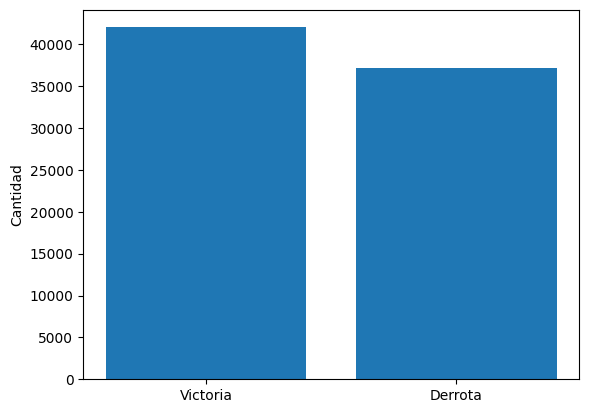

In [61]:
#grafico de derrotas y victorias (recuerda usar funcion 1.1)

counts = df['MatchWinner'].value_counts()
etiquetas = ['Victoria', 'Derrota']

plt.bar(counts.index, counts.values.astype(int))
plt.xticks(counts.index, etiquetas)
plt.ylabel('Cantidad')
plt.show()


Kills

In [62]:
#CALCULO DE LA MEDIA

promedio = df['RoundKills'].mean()
print(f"El promedio de kills de un jugador es de {round(promedio)} kill por partida.")

El promedio de kills de un jugador es de 1 kill por partida.


In [63]:
# CALCULO DE MODA

moda = df['MatchKills'].mode()

# Imprimimos la moda
print(f"es mas probable que el jugador termine con  {(moda)} kill al finalizar la partida.")



es mas probable que el jugador termine con  0    0.04878
Name: MatchKills, dtype: float64 kill al finalizar la partida.


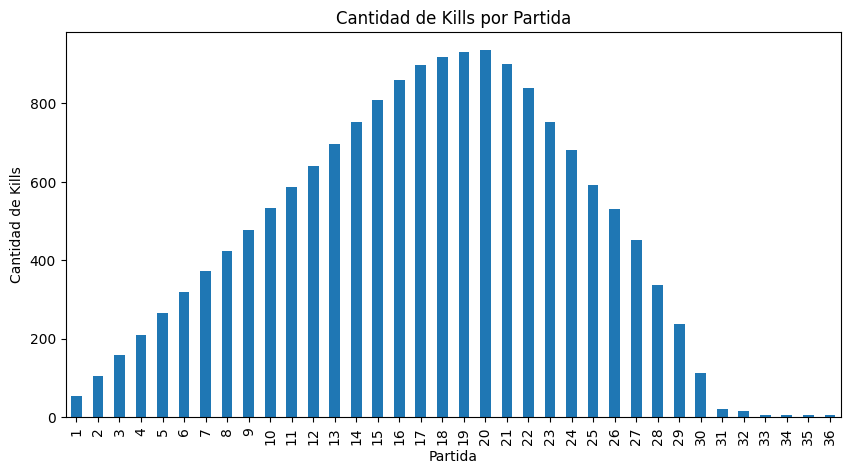

In [64]:
#Grafico de Kills totales por Partida

# Agrupar los datos por 'RoundId' y calcular la suma de 'MatchKills' en cada grupo
data = df.groupby('RoundId')['MatchKills'].sum()

# Crear el gráfico de barras
data.plot(kind='bar', figsize=(10, 5))

# Personalizar el gráfico
plt.xlabel('Partida')
plt.ylabel('Cantidad de Kills')
plt.title('Cantidad de Kills por Partida')

# Mostrar el gráfico
plt.show()


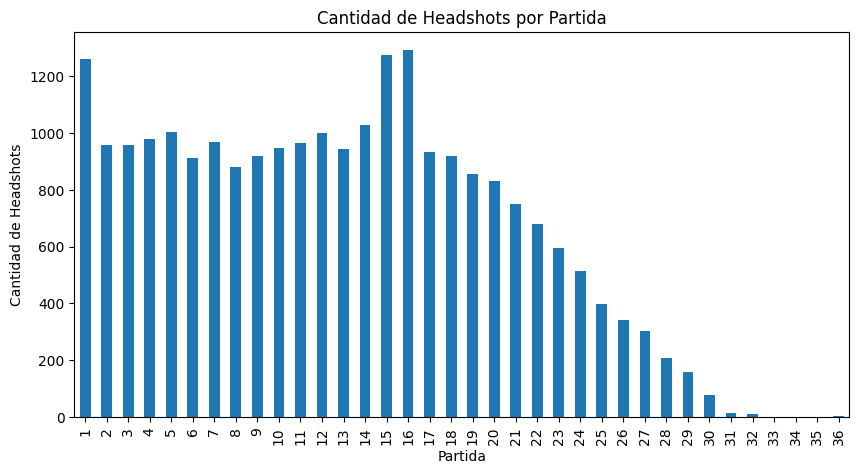

In [65]:
#Grafico de headshots totales por partida

# Agrupar los datos por 'RoundId' y calcular la suma de 'MatchKills' en cada grupo
data = df.groupby('RoundId')['RoundHeadshots'].sum()

# Crear el gráfico de barras
data.plot(kind='bar', figsize=(10, 5))

# Personalizar el gráfico
plt.xlabel('Partida')
plt.ylabel('Cantidad de Headshots')
plt.title('Cantidad de Headshots por Partida')

# Mostrar el gráfico
plt.show()


Survived


In [66]:
#MODA DE PARTIDAS
moda_survived = df['Survived'].mode()

if any(moda_survived == 0.0):
    print('La mayoria de los jugadores mueren antes del termino de la partida.')
elif any(moda_survived == 1.0):
    print('La mayoria de los jugadores sobreviven antes del termino de la partida.')

La mayoria de los jugadores mueren antes del termino de la partida.


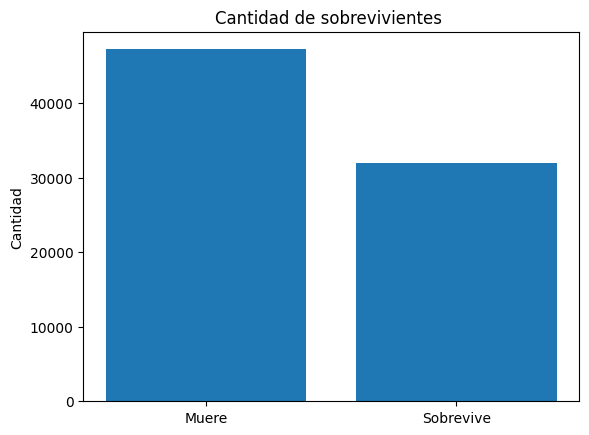

In [67]:
#grafico de derrotas y victorias (recuerda usar funcion de data preparation)
counts = df['Survived'].value_counts()
etiquetas = ['Muere', 'Sobrevive']
plt.bar(counts.index, counts.values)
plt.xticks(counts.index, etiquetas)
plt.ylabel('Cantidad')
plt.title('Cantidad de sobrevivientes ')
plt.show()

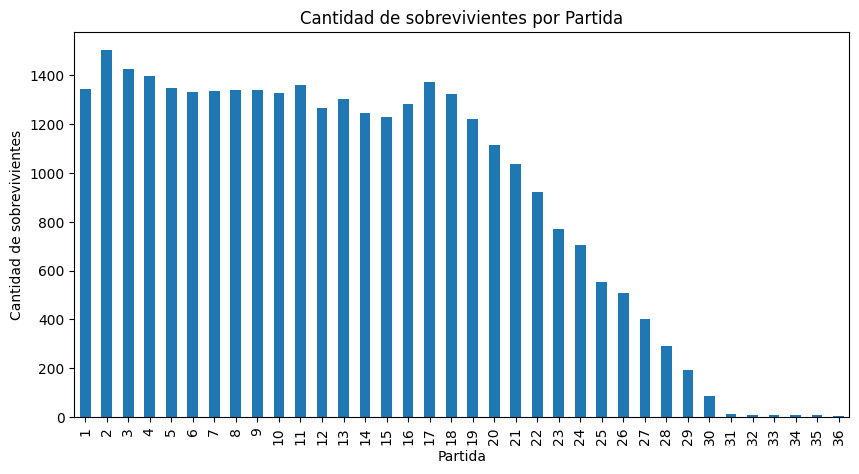

In [68]:
#Cantidad de sobrevivientes por round

#Grafico de headshots totales por partida

# Agrupar los datos por 'RoundId' y calcular la suma de 'MatchKills' en cada grupo
data = df.groupby('RoundId')['Survived'].sum()

# Crear el gráfico de barras
data.plot(kind='bar', figsize=(10, 5))

# Personalizar el gráfico
plt.xlabel('Partida')
plt.ylabel('Cantidad de sobrevivientes')
plt.title('Cantidad de sobrevivientes por Partida')

# Mostrar el gráfico
plt.show()

InternalTeamId

In [69]:
#CREACION DE DATA SET EQUIPO TERRORISTA
valor_comun = 1

# Crear un nuevo DataFrame con los datos que tienen un valor en común
terrorist_df = df.loc[df['InternalTeamId'] == valor_comun].copy()

# Mostrar el nuevo DataFrame
print(terrorist_df)

              Map       Team  InternalTeamId  MatchId  RoundId RoundWinner  \
0      de_inferno  Terrorist               1        4        1       False   
1      de_inferno  Terrorist               1        4        1       False   
2      de_inferno  Terrorist               1        4        1       False   
3      de_inferno  Terrorist               1        4        1       False   
4      de_inferno  Terrorist               1        4        1       False   
...           ...        ...             ...      ...      ...         ...   
79147   de_mirage  Terrorist               1      511        5        True   
79148   de_mirage  Terrorist               1      511        5        True   
79149   de_mirage  Terrorist               1      511        5        True   
79150   de_mirage  Terrorist               1      511        5        True   
79151   de_mirage  Terrorist               1      511        5        True   

       MatchWinner  Survived  TimeAlive  PrimaryAssaultRifle  .

In [70]:
#MODA DE PARTIDAS DEL EQUIPO TERRORISTA
moda_matchWinner = terrorist_df['MatchWinner'].mode()

if any(moda_matchWinner == 0.0):
    print('La mayoría de los terroristas pierden las partidas.')
elif any(moda_matchWinner == 1.0):
    print('La mayoría de los terroristas ganan las partidas.')

La mayoría de los terroristas ganan las partidas.


In [71]:
#CREACION DEL DATASET PARA EL EQUIPO COUNTER
valor_comun = 2

# Crear un nuevo DataFrame con los datos que tienen un valor en común
counter_df = df.loc[df['InternalTeamId'] == valor_comun].copy()

# Mostrar el nuevo DataFrame
print(counter_df)

              Map              Team  InternalTeamId  MatchId  RoundId  \
5      de_inferno  CounterTerrorist               2        4        1   
6      de_inferno  CounterTerrorist               2        4        1   
7      de_inferno  CounterTerrorist               2        4        1   
8      de_inferno  CounterTerrorist               2        4        1   
9      de_inferno  CounterTerrorist               2        4        1   
...           ...               ...             ...      ...      ...   
79152   de_mirage  CounterTerrorist               2      511        5   
79153   de_mirage  CounterTerrorist               2      511        5   
79154   de_mirage  CounterTerrorist               2      511        5   
79155   de_mirage  CounterTerrorist               2      511        5   
79156   de_mirage  CounterTerrorist               2      511        5   

      RoundWinner  MatchWinner  Survived  TimeAlive  PrimaryAssaultRifle  ...  \
5            True          0.0      True  

In [72]:
#MODA DE PARTIDAS DEL EQUIPO COUNTER
moda_matchWinner = df['MatchWinner'].mode()

if any(moda_matchWinner == 0.0):
    print('En el conjunto de datos la mayoría de las partidas son derrotas.')
elif any(moda_matchWinner == 1.0):
    print('En el conjunto de datos la mayoría de las partidas son victorias.')


En el conjunto de datos la mayoría de las partidas son derrotas.


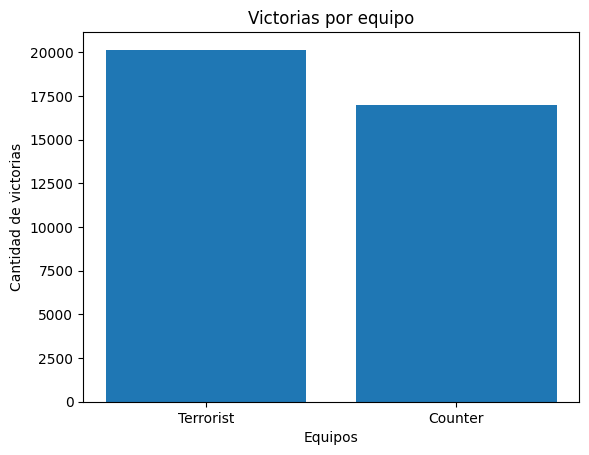

In [73]:
#COMPARACION DE VICTORIAS ENTRE TERRORISTAS Y COUNTER
df_filtered = df[df['MatchWinner'].isin([1, 2])]

victorias = df_filtered[df_filtered['InternalTeamId'] == 1]['InternalTeamId'].count()
derrotas = df_filtered[df_filtered['InternalTeamId'] == 2]['InternalTeamId'].count()

equipos = ['Terrorist', 'Counter']
resultados = [victorias, derrotas]

plt.bar(equipos, resultados)

plt.xlabel('Equipos')
plt.ylabel('Cantidad de victorias')
plt.title('Victorias por equipo')

plt.show()


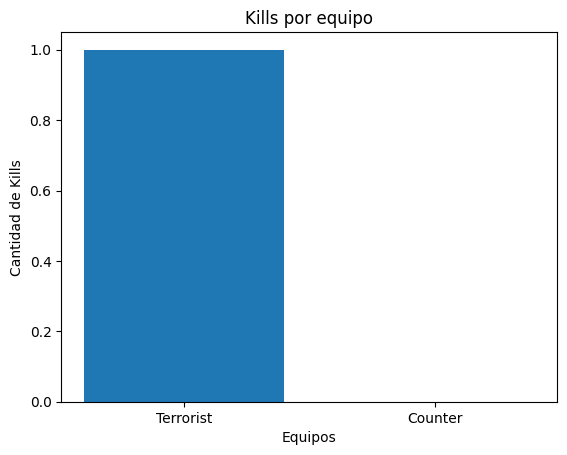

In [74]:
#COMPARACION DE KILLS ENTRE TERRORISTAS Y COUNTER

#COMPARACION DE VICTORIAS ENTRE TERRORISTAS Y COUNTER
df_filtered = df[df['MatchKills'].isin([1, 2])]

victorias = df_filtered[df_filtered['InternalTeamId'] == 1]['InternalTeamId'].count()
derrotas = df_filtered[df_filtered['InternalTeamId'] == 2]['InternalTeamId'].count()

equipos = ['Terrorist', 'Counter']
resultados = [victorias, derrotas]

plt.bar(equipos, resultados)

plt.xlabel('Equipos')
plt.ylabel('Cantidad de Kills')
plt.title('Kills por equipo')

plt.show()


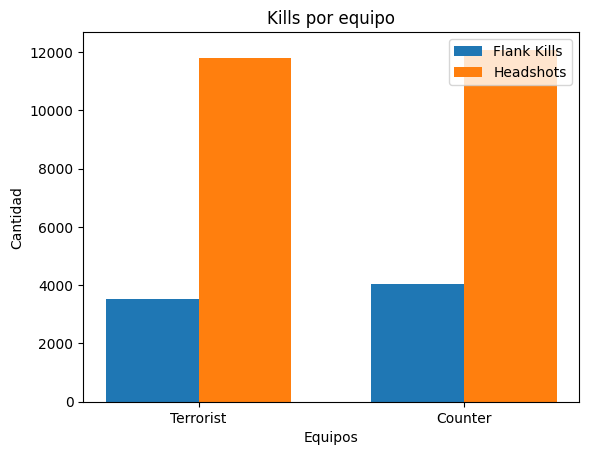

In [75]:
#COMPARACION DE KILLS ENTRE TERRORISTAS Y COUNTER


df_filtered = df[df['InternalTeamId'].isin([1, 2])]
headshots = df_filtered.groupby('InternalTeamId')['RoundHeadshots'].sum()
flank_kills = df_filtered.groupby('InternalTeamId')['RoundFlankKills'].sum()

equipos = ['Flank Kills', 'Headshots']
resultados = [flank_kills.values, headshots.values]
n = len(equipos)
width = 0.35
fig, ax = plt.subplots()
for i in range(n):
    ax.bar(np.arange(n) + i * width, resultados[i], width, label=equipos[i])

ax.set_xlabel('Equipos')
ax.set_ylabel('Cantidad')
ax.set_title('Kills por equipo')
ax.set_xticks(np.arange(n) + width / 2)
ax.set_xticklabels(['Terrorist', 'Counter'])
ax.legend()

plt.show()

ArmaElegida

In [76]:
#MODA DE ARMA ELEGIDA
moda_arma = df['ArmaElegida'].mode()

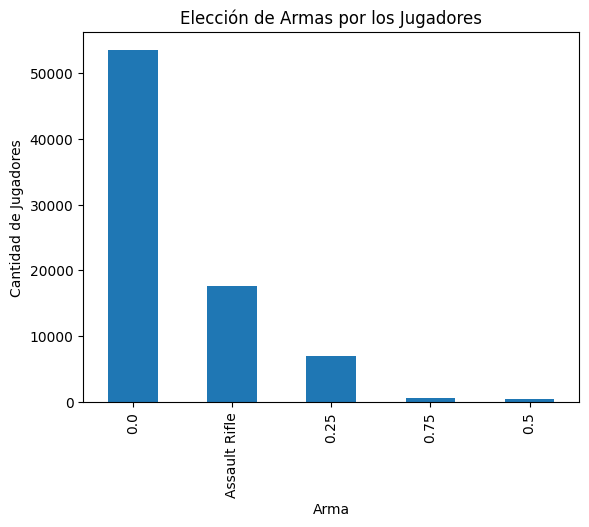

In [77]:
#GRAFICO DE ARMAS MAS POPULARES EN EL JUEGO


# Crear un diccionario de mapeo de valores numéricos a nombres de armas
arma_mapping = {1: 'Assault Rifle', 2: 'Sniper Rifle', 3: 'Heavy', 4: 'SMG', 5: 'Pistol'}

# Reemplazar los valores numéricos por los nombres de las armas
df['ArmaNombre'] = df['ArmaElegida'].replace(arma_mapping)

# Calcular el conteo de jugadores por arma
conteo_armas = df['ArmaNombre'].value_counts()

# Crear el gráfico de barras
conteo_armas.plot(kind='bar')

# Configurar etiquetas y título del gráfico
plt.xlabel('Arma')
plt.ylabel('Cantidad de Jugadores')
plt.title('Elección de Armas por los Jugadores')

# Mostrar el gráfico
plt.show()


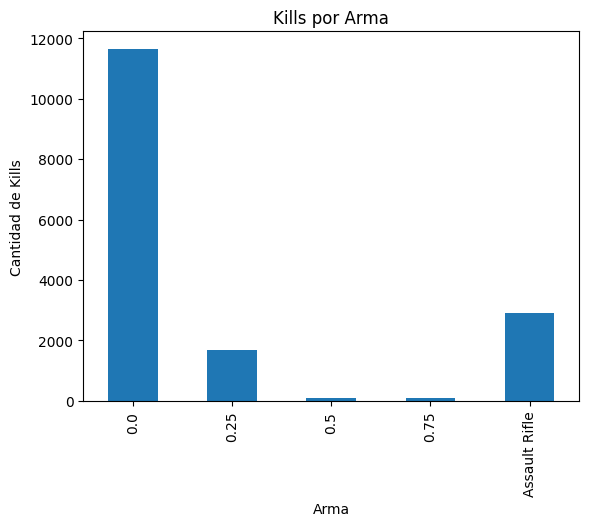

In [78]:
#kills por cada arma

# Calcular la suma de 'MatchKills' por 'ArmaNombre'
kills_por_arma = df.groupby('ArmaNombre')['MatchKills'].sum()

# Crear el gráfico de barras
kills_por_arma.plot(kind='bar')

# Configurar etiquetas y título del gráfico
plt.xlabel('Arma')
plt.ylabel('Cantidad de Kills')
plt.title('Kills por Arma')

# Mostrar el gráfico
plt.show()


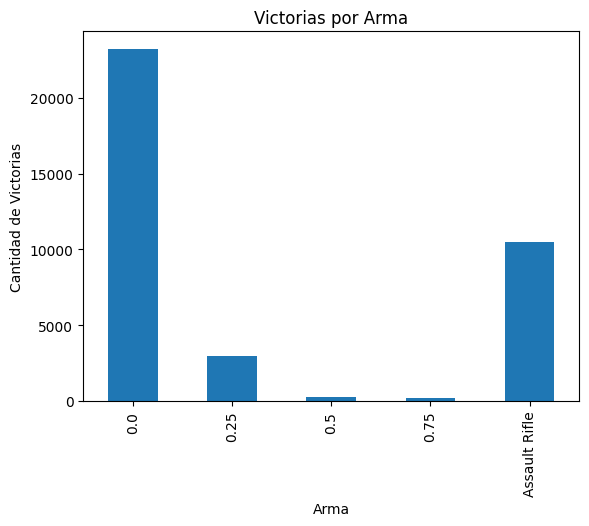

In [79]:
#kills por cada arma

# Calcular la suma de 'MatchKills' por 'ArmaNombre'
kills_por_arma = df.groupby('ArmaNombre')['MatchWinner'].sum()

# Crear el gráfico de barras
kills_por_arma.plot(kind='bar')

# Configurar etiquetas y título del gráfico
plt.xlabel('Arma')
plt.ylabel('Cantidad de Victorias')
plt.title('Victorias por Arma')

# Mostrar el gráfico
plt.show()


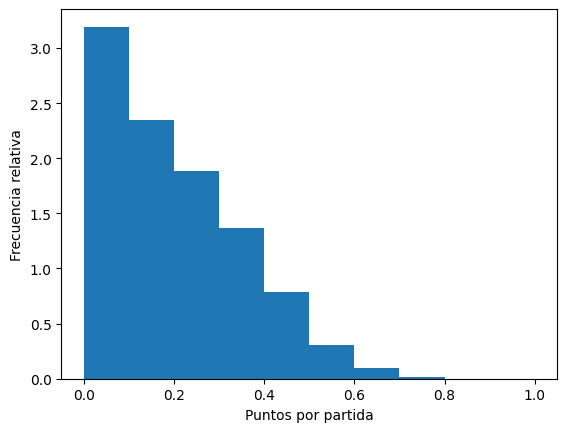

In [80]:
plt.hist(df['MatchKills'], bins=10, density=True)
plt.xlabel('Puntos por partida')
plt.ylabel('Frecuencia relativa')
plt.show()

Graficos de correlacion entre datos

In [81]:
#Matriz de correlacion entre columnas

columnas = ["MatchKills", "MatchHeadshots", "RoundId", "MatchFlankKills",
            "PrimaryAssaultRifle", "PrimarySniperRifle", "PrimaryHeavy", "PrimarySMG", "PrimaryPistol"]
df_subset = df[columnas]

corr_matrix = df_subset.corr()
corr_match_kills = corr_matrix["MatchKills"].sort_values(ascending=False)

print(corr_match_kills)



MatchKills             1.000000
MatchHeadshots         0.831445
RoundId                0.807490
MatchFlankKills        0.641588
PrimaryAssaultRifle    0.095194
PrimarySniperRifle     0.069302
PrimaryHeavy          -0.009769
PrimarySMG            -0.021332
PrimaryPistol         -0.147015
Name: MatchKills, dtype: float64


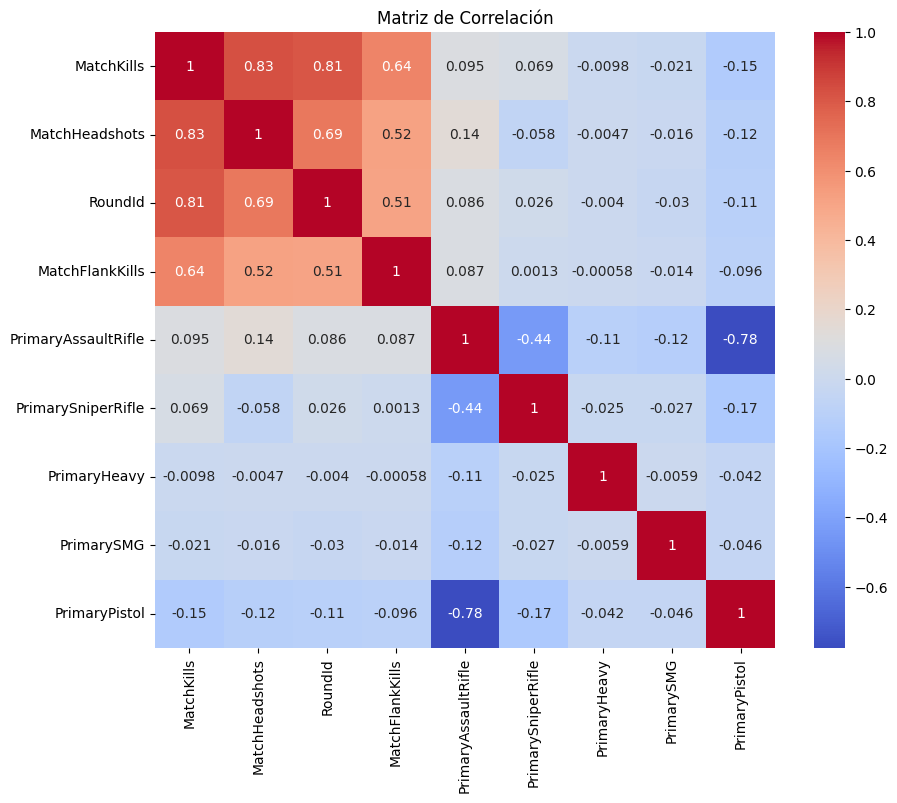

In [82]:
#Grafica de la matriz de correlacion

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Graficar la matriz de correlación como un heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Configurar el título del gráfico
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()


Graficos de relacion entre datos

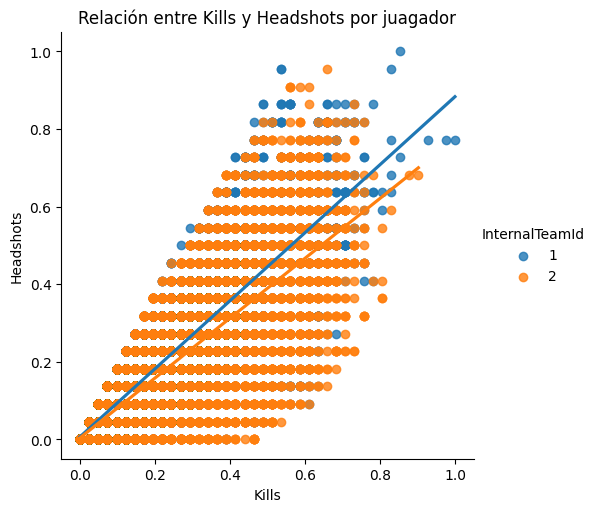

In [83]:
# Relación entre Kills y Headshots por juagador
sns.lmplot(x="MatchKills", y="MatchHeadshots", hue="InternalTeamId", data=df)

plt.xlabel('Kills')
plt.ylabel('Headshots')
plt.title('Relación entre Kills y Headshots por juagador')

plt.show()



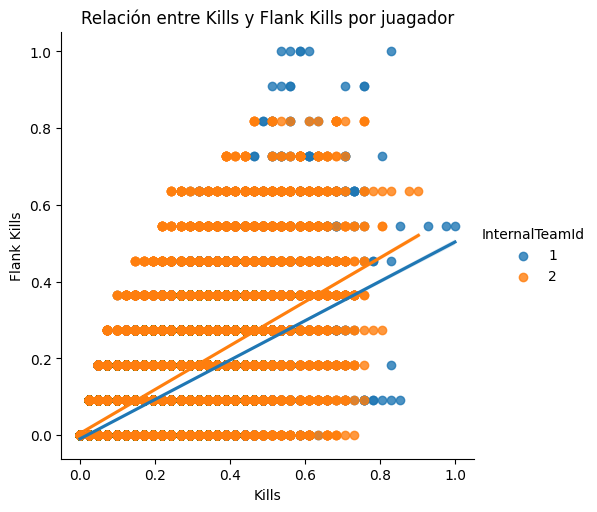

In [84]:
# Relación entre Kills y Headshots por juagador
sns.lmplot(x="MatchKills", y="MatchFlankKills", hue="InternalTeamId", data=df)

plt.xlabel('Kills')
plt.ylabel('Flank Kills')
plt.title('Relación entre Kills y Flank Kills por juagador')

plt.show()


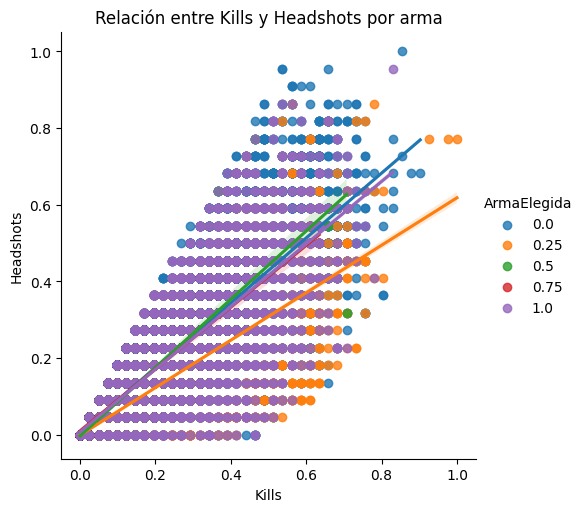

In [85]:
#relacion entre las Kills y la arma primaria del jugador
sns.lmplot(x="MatchKills", y="MatchHeadshots", hue="ArmaElegida", data=df)

plt.xlabel('Kills')
plt.ylabel('Headshots')
plt.title('Relación entre Kills y Headshots por arma')

plt.show()


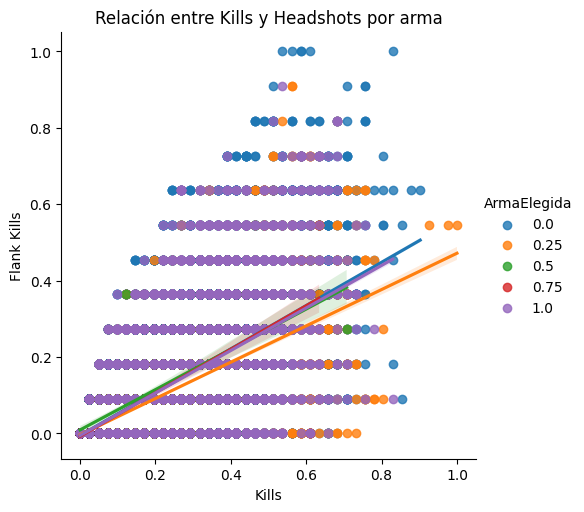

In [86]:
#relacion entre las Kills y la arma primaria del jugador
sns.lmplot(x="MatchKills", y="MatchFlankKills", hue="ArmaElegida", data=df)

plt.xlabel('Kills')
plt.ylabel('Flank Kills')
plt.title('Relación entre Kills y Headshots por arma')

plt.show()

## Fase 3: Data Preparation

realizar level encoding

In [26]:
#TECNICA DE LEBEL ENCODING PARA TEAM

label_encoder = LabelEncoder()
df['Team_encoded'] = label_encoder.fit_transform(df['Team'])

In [27]:
#TECNICA DE LEBEL ENCODING PARA MATCHWINNER

df['RoundWinner'] = df['RoundWinner'].astype(str)
label_encoder = LabelEncoder()
df['RoundWinner_encoded'] = label_encoder.fit_transform(df['RoundWinner'])

Escalar datos de las tablas importantes

In [28]:
#MatchKills
scaler = MinMaxScaler()
df['MatchKills'] = scaler.fit_transform(df[['MatchKills']])
print(df)

       Unnamed: 0         Map              Team  InternalTeamId  MatchId  \
0             600  de_inferno         Terrorist               1        4   
1             601  de_inferno         Terrorist               1        4   
2             602  de_inferno         Terrorist               1        4   
3             603  de_inferno         Terrorist               1        4   
4             604  de_inferno         Terrorist               1        4   
...           ...         ...               ...             ...      ...   
79152      123775   de_mirage  CounterTerrorist               2      511   
79153      123776   de_mirage  CounterTerrorist               2      511   
79154      123777   de_mirage  CounterTerrorist               2      511   
79155      123778   de_mirage  CounterTerrorist               2      511   
79156      123779   de_mirage  CounterTerrorist               2      511   

       RoundId RoundWinner MatchWinner  Survived  AbnormalMatch  ...  \
0            1 

In [29]:
#MatchWinner
scaler = MinMaxScaler()
df['MatchWinner'] = scaler.fit_transform(df[['MatchWinner']])
print(df)

       Unnamed: 0         Map              Team  InternalTeamId  MatchId  \
0             600  de_inferno         Terrorist               1        4   
1             601  de_inferno         Terrorist               1        4   
2             602  de_inferno         Terrorist               1        4   
3             603  de_inferno         Terrorist               1        4   
4             604  de_inferno         Terrorist               1        4   
...           ...         ...               ...             ...      ...   
79152      123775   de_mirage  CounterTerrorist               2      511   
79153      123776   de_mirage  CounterTerrorist               2      511   
79154      123777   de_mirage  CounterTerrorist               2      511   
79155      123778   de_mirage  CounterTerrorist               2      511   
79156      123779   de_mirage  CounterTerrorist               2      511   

       RoundId RoundWinner  MatchWinner  Survived  AbnormalMatch  ...  \
0            1

In [30]:
#RoundWinner
scaler = MinMaxScaler()
df['RoundWinner_scaled'] = scaler.fit_transform(df[['RoundWinner_encoded']])
print(df)

       Unnamed: 0         Map              Team  InternalTeamId  MatchId  \
0             600  de_inferno         Terrorist               1        4   
1             601  de_inferno         Terrorist               1        4   
2             602  de_inferno         Terrorist               1        4   
3             603  de_inferno         Terrorist               1        4   
4             604  de_inferno         Terrorist               1        4   
...           ...         ...               ...             ...      ...   
79152      123775   de_mirage  CounterTerrorist               2      511   
79153      123776   de_mirage  CounterTerrorist               2      511   
79154      123777   de_mirage  CounterTerrorist               2      511   
79155      123778   de_mirage  CounterTerrorist               2      511   
79156      123779   de_mirage  CounterTerrorist               2      511   

       RoundId RoundWinner  MatchWinner  Survived  AbnormalMatch  ...  \
0            1

In [31]:
#Team
scaler = MinMaxScaler()
df['Team_scaled'] = scaler.fit_transform(df[['Team_encoded']])
print(df)

       Unnamed: 0         Map              Team  InternalTeamId  MatchId  \
0             600  de_inferno         Terrorist               1        4   
1             601  de_inferno         Terrorist               1        4   
2             602  de_inferno         Terrorist               1        4   
3             603  de_inferno         Terrorist               1        4   
4             604  de_inferno         Terrorist               1        4   
...           ...         ...               ...             ...      ...   
79152      123775   de_mirage  CounterTerrorist               2      511   
79153      123776   de_mirage  CounterTerrorist               2      511   
79154      123777   de_mirage  CounterTerrorist               2      511   
79155      123778   de_mirage  CounterTerrorist               2      511   
79156      123779   de_mirage  CounterTerrorist               2      511   

       RoundId RoundWinner  MatchWinner  Survived  AbnormalMatch  ...  \
0            1

In [32]:
#MatchHeadshots
scaler = MinMaxScaler()
df['MatchHeadshots'] = scaler.fit_transform(df[['MatchHeadshots']])
print(df)

       Unnamed: 0         Map              Team  InternalTeamId  MatchId  \
0             600  de_inferno         Terrorist               1        4   
1             601  de_inferno         Terrorist               1        4   
2             602  de_inferno         Terrorist               1        4   
3             603  de_inferno         Terrorist               1        4   
4             604  de_inferno         Terrorist               1        4   
...           ...         ...               ...             ...      ...   
79152      123775   de_mirage  CounterTerrorist               2      511   
79153      123776   de_mirage  CounterTerrorist               2      511   
79154      123777   de_mirage  CounterTerrorist               2      511   
79155      123778   de_mirage  CounterTerrorist               2      511   
79156      123779   de_mirage  CounterTerrorist               2      511   

       RoundId RoundWinner  MatchWinner  Survived  AbnormalMatch  ...  \
0            1

In [33]:
#Flank Kills
scaler = MinMaxScaler()
df['MatchFlankKills'] = scaler.fit_transform(df[['MatchFlankKills']])
print(df)

       Unnamed: 0         Map              Team  InternalTeamId  MatchId  \
0             600  de_inferno         Terrorist               1        4   
1             601  de_inferno         Terrorist               1        4   
2             602  de_inferno         Terrorist               1        4   
3             603  de_inferno         Terrorist               1        4   
4             604  de_inferno         Terrorist               1        4   
...           ...         ...               ...             ...      ...   
79152      123775   de_mirage  CounterTerrorist               2      511   
79153      123776   de_mirage  CounterTerrorist               2      511   
79154      123777   de_mirage  CounterTerrorist               2      511   
79155      123778   de_mirage  CounterTerrorist               2      511   
79156      123779   de_mirage  CounterTerrorist               2      511   

       RoundId RoundWinner  MatchWinner  Survived  AbnormalMatch  ...  \
0            1

In [34]:
#PrimaryPistol
scaler = MinMaxScaler()
df['PrimaryPistol'] = scaler.fit_transform(df[['PrimaryPistol']])
print(df)

       Unnamed: 0         Map              Team  InternalTeamId  MatchId  \
0             600  de_inferno         Terrorist               1        4   
1             601  de_inferno         Terrorist               1        4   
2             602  de_inferno         Terrorist               1        4   
3             603  de_inferno         Terrorist               1        4   
4             604  de_inferno         Terrorist               1        4   
...           ...         ...               ...             ...      ...   
79152      123775   de_mirage  CounterTerrorist               2      511   
79153      123776   de_mirage  CounterTerrorist               2      511   
79154      123777   de_mirage  CounterTerrorist               2      511   
79155      123778   de_mirage  CounterTerrorist               2      511   
79156      123779   de_mirage  CounterTerrorist               2      511   

       RoundId RoundWinner  MatchWinner  Survived  AbnormalMatch  ...  \
0            1

In [35]:
#PrimaryAssaultRifle
scaler = MinMaxScaler()
df['PrimaryAssaultRifle'] = scaler.fit_transform(df[['PrimaryAssaultRifle']])
print(df)

       Unnamed: 0         Map              Team  InternalTeamId  MatchId  \
0             600  de_inferno         Terrorist               1        4   
1             601  de_inferno         Terrorist               1        4   
2             602  de_inferno         Terrorist               1        4   
3             603  de_inferno         Terrorist               1        4   
4             604  de_inferno         Terrorist               1        4   
...           ...         ...               ...             ...      ...   
79152      123775   de_mirage  CounterTerrorist               2      511   
79153      123776   de_mirage  CounterTerrorist               2      511   
79154      123777   de_mirage  CounterTerrorist               2      511   
79155      123778   de_mirage  CounterTerrorist               2      511   
79156      123779   de_mirage  CounterTerrorist               2      511   

       RoundId RoundWinner  MatchWinner  Survived  AbnormalMatch  ...  \
0            1

Limpieza


In [36]:
#limpiar datos nulos

#eliminamos datos nulos
df.columns

df=df.drop(['Unnamed: 0'],axis=1)

In [37]:
#eliminar filas problematicas

df.drop([629, 977, 4888], axis=0)

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,...,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,Team_encoded,RoundWinner_encoded,RoundWinner_scaled,Team_scaled
0,de_inferno,Terrorist,1,4,1,False,1.0,False,False,51.120.248.995.704.500,...,750,4400,0.000000,0.000000,0,0.000000,1,0,0.0,0.5
1,de_inferno,Terrorist,1,4,1,False,1.0,False,False,4.348.662.552.266.170,...,800,4400,0.000000,0.000000,0,0.000000,1,0,0.0,0.5
2,de_inferno,Terrorist,1,4,1,False,1.0,False,False,3.735.469.847.054.540,...,1000,4400,0.000000,0.000000,0,0.000000,1,0,0.0,0.5
3,de_inferno,Terrorist,1,4,1,False,1.0,False,False,4.767.886.136.441.470,...,850,4400,0.000000,0.000000,0,0.000000,1,0,0.0,0.5
4,de_inferno,Terrorist,1,4,1,False,1.0,True,False,5.312.251.089.027.310,...,1000,4400,0.000000,0.000000,0,0.000000,1,0,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,de_mirage,CounterTerrorist,2,511,5,False,0.0,False,False,340.272.074.099.723,...,5600,27100,0.097561,0.000000,2,0.090909,0,0,0.0,0.0
79153,de_mirage,CounterTerrorist,2,511,5,False,0.0,False,False,2.926.105.436.288.080,...,5500,27100,0.195122,0.454545,1,0.136364,0,0,0.0,0.0
79154,de_mirage,CounterTerrorist,2,511,5,False,0.0,False,False,5.914.717.797.783.930,...,4950,27100,0.121951,0.000000,2,0.136364,0,0,0.0,0.0
79155,de_mirage,CounterTerrorist,2,511,5,False,0.0,False,False,42.582.842.797.783.900,...,4950,27100,0.024390,0.000000,1,0.000000,0,0,0.0,0.0


In [38]:
#eliminar columna abnormal match

df = df.drop("AbnormalMatch", axis=1)
df.columns

Index(['Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId', 'RoundWinner',
       'MatchWinner', 'Survived', 'TimeAlive', 'TravelledDistance',
       'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown',
       'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy',
       'PrimarySMG', 'PrimaryPistol', 'FirstKillTime', 'RoundKills',
       'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots',
       'Team_encoded', 'RoundWinner_encoded', 'RoundWinner_scaled',
       'Team_scaled'],
      dtype='object')

In [39]:
#eliminar columnas de granadas

df = df.drop("RLethalGrenadesThrown", axis=1)
df = df.drop("RNonLethalGrenadesThrown", axis=1)
df.columns

Index(['Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId', 'RoundWinner',
       'MatchWinner', 'Survived', 'TimeAlive', 'TravelledDistance',
       'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy',
       'PrimarySMG', 'PrimaryPistol', 'FirstKillTime', 'RoundKills',
       'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots',
       'Team_encoded', 'RoundWinner_encoded', 'RoundWinner_scaled',
       'Team_scaled'],
      dtype='object')

In [40]:
#eliminar tabla TravelledDistance
df = df.drop("TravelledDistance", axis=1)
df.columns

Index(['Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId', 'RoundWinner',
       'MatchWinner', 'Survived', 'TimeAlive', 'PrimaryAssaultRifle',
       'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol',
       'FirstKillTime', 'RoundKills', 'RoundAssists', 'RoundHeadshots',
       'RoundFlankKills', 'RoundStartingEquipmentValue',
       'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills',
       'MatchAssists', 'MatchHeadshots', 'Team_encoded', 'RoundWinner_encoded',
       'RoundWinner_scaled', 'Team_scaled'],
      dtype='object')

Eliminar datos nulos (no ejecutar)

In [41]:
# Eliminar filas con valores nulos en todo el dataset
df.dropna(inplace=True)

In [42]:
df.head()

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,TimeAlive,PrimaryAssaultRifle,...,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,Team_encoded,RoundWinner_encoded,RoundWinner_scaled,Team_scaled
0,de_inferno,Terrorist,1,4,1,False,1.0,False,51.120.248.995.704.500,0.0,...,750,4400,0.0,0.0,0,0.0,1,0,0.0,0.5
1,de_inferno,Terrorist,1,4,1,False,1.0,False,4.348.662.552.266.170,0.0,...,800,4400,0.0,0.0,0,0.0,1,0,0.0,0.5
2,de_inferno,Terrorist,1,4,1,False,1.0,False,3.735.469.847.054.540,0.0,...,1000,4400,0.0,0.0,0,0.0,1,0,0.0,0.5
3,de_inferno,Terrorist,1,4,1,False,1.0,False,4.767.886.136.441.470,0.0,...,850,4400,0.0,0.0,0,0.0,1,0,0.0,0.5
4,de_inferno,Terrorist,1,4,1,False,1.0,True,5.312.251.089.027.310,0.0,...,1000,4400,0.0,0.0,0,0.0,1,0,0.0,0.5


In [43]:
df.shape

(79154, 29)

Columna Arma Elegida

In [44]:
#crear nueva columna ArmaElegida con datos integer para representar que arma eligio el jugador
df['ArmaElegida'] = df[['PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol']].apply(lambda row: row.idxmax(), axis=1)
arma_mapping = {'PrimaryAssaultRifle': 1, 'PrimarySniperRifle': 2, 'PrimaryHeavy': 3, 'PrimarySMG': 4, 'PrimaryPistol': 5}
df['ArmaElegida'] = df['ArmaElegida'].map(arma_mapping)
# Imprimir el resultado
print(df['ArmaElegida'])


0        5
1        5
2        5
3        5
4        5
        ..
79152    1
79153    1
79154    1
79155    2
79156    1
Name: ArmaElegida, Length: 79154, dtype: int64


In [45]:
# ArmaElegida
scaler = MinMaxScaler()
df['ArmaElegida'] = scaler.fit_transform(df[['ArmaElegida']])
print(df)

              Map              Team  InternalTeamId  MatchId  RoundId  \
0      de_inferno         Terrorist               1        4        1   
1      de_inferno         Terrorist               1        4        1   
2      de_inferno         Terrorist               1        4        1   
3      de_inferno         Terrorist               1        4        1   
4      de_inferno         Terrorist               1        4        1   
...           ...               ...             ...      ...      ...   
79152   de_mirage  CounterTerrorist               2      511        5   
79153   de_mirage  CounterTerrorist               2      511        5   
79154   de_mirage  CounterTerrorist               2      511        5   
79155   de_mirage  CounterTerrorist               2      511        5   
79156   de_mirage  CounterTerrorist               2      511        5   

      RoundWinner  MatchWinner  Survived               TimeAlive  \
0           False          1.0     False  51.120.248.99

In [46]:
#verificar columna ArmaElegida
df.head()

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,TimeAlive,PrimaryAssaultRifle,...,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,Team_encoded,RoundWinner_encoded,RoundWinner_scaled,Team_scaled,ArmaElegida
0,de_inferno,Terrorist,1,4,1,False,1.0,False,51.120.248.995.704.500,0.0,...,4400,0.0,0.0,0,0.0,1,0,0.0,0.5,1.0
1,de_inferno,Terrorist,1,4,1,False,1.0,False,4.348.662.552.266.170,0.0,...,4400,0.0,0.0,0,0.0,1,0,0.0,0.5,1.0
2,de_inferno,Terrorist,1,4,1,False,1.0,False,3.735.469.847.054.540,0.0,...,4400,0.0,0.0,0,0.0,1,0,0.0,0.5,1.0
3,de_inferno,Terrorist,1,4,1,False,1.0,False,4.767.886.136.441.470,0.0,...,4400,0.0,0.0,0,0.0,1,0,0.0,0.5,1.0
4,de_inferno,Terrorist,1,4,1,False,1.0,True,5.312.251.089.027.310,0.0,...,4400,0.0,0.0,0,0.0,1,0,0.0,0.5,1.0


In [47]:
df.columns

Index(['Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId', 'RoundWinner',
       'MatchWinner', 'Survived', 'TimeAlive', 'PrimaryAssaultRifle',
       'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol',
       'FirstKillTime', 'RoundKills', 'RoundAssists', 'RoundHeadshots',
       'RoundFlankKills', 'RoundStartingEquipmentValue',
       'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills',
       'MatchAssists', 'MatchHeadshots', 'Team_encoded', 'RoundWinner_encoded',
       'RoundWinner_scaled', 'Team_scaled', 'ArmaElegida'],
      dtype='object')

Columna TimeAlive

In [48]:
df['TimeAlive'] = df['TimeAlive'].str.replace('.', '')
df['TimeAlive'] = pd.to_numeric(df['TimeAlive']).astype('float64')
print(df['TimeAlive'])


0        5.112025e+16
1        4.348663e+15
2        3.735470e+15
3        4.767886e+15
4        5.312251e+15
             ...     
79152    3.402721e+14
79153    2.926105e+15
79154    5.914718e+15
79155    4.258284e+16
79156    8.004793e+15
Name: TimeAlive, Length: 79154, dtype: float64


<ipython-input-48-a564bc4289f0>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['TimeAlive'] = df['TimeAlive'].str.replace('.', '')


In [49]:
#Redondear los datos de TimeAlive para mostrar las primeras 9 cifras

df['TimeAlive'] = df['TimeAlive'].apply(lambda x: str(round(x, 9))[:9])
print(df['TimeAlive'])

0        5.1120248
1        434866255
2        373546984
3        476788613
4        531225108
           ...    
79152    340272074
79153    292610543
79154    591471779
79155    4.2582842
79156    800479310
Name: TimeAlive, Length: 79154, dtype: object


Dataset para  equipos Terrorist y Counter

In [50]:
#CREACION DE DATA SET EQUIPO TERRORISTA
valor_comun = 1

# Crear un nuevo DataFrame con los datos que tienen un valor en común
terrorist_df = df.loc[df['InternalTeamId'] == valor_comun].copy()

# Mostrar el nuevo DataFrame
print(terrorist_df)

              Map       Team  InternalTeamId  MatchId  RoundId RoundWinner  \
0      de_inferno  Terrorist               1        4        1       False   
1      de_inferno  Terrorist               1        4        1       False   
2      de_inferno  Terrorist               1        4        1       False   
3      de_inferno  Terrorist               1        4        1       False   
4      de_inferno  Terrorist               1        4        1       False   
...           ...        ...             ...      ...      ...         ...   
79147   de_mirage  Terrorist               1      511        5        True   
79148   de_mirage  Terrorist               1      511        5        True   
79149   de_mirage  Terrorist               1      511        5        True   
79150   de_mirage  Terrorist               1      511        5        True   
79151   de_mirage  Terrorist               1      511        5        True   

       MatchWinner  Survived  TimeAlive  PrimaryAssaultRifle  .

MatchWinner

In [51]:
#transformar los datos de match winner a numerico (no ejecutar)

df['MatchWinner'] = pd.to_numeric(df['MatchWinner'])

In [52]:
# one Hot encoding para RoundWinner 1.1
encoded_df = pd.get_dummies(df['MatchWinner'])

# Combina el DataFrame original con el DataFrame codificado
df_encoded = pd.concat([df, encoded_df], axis=1)

print(df_encoded)

              Map              Team  InternalTeamId  MatchId  RoundId  \
0      de_inferno         Terrorist               1        4        1   
1      de_inferno         Terrorist               1        4        1   
2      de_inferno         Terrorist               1        4        1   
3      de_inferno         Terrorist               1        4        1   
4      de_inferno         Terrorist               1        4        1   
...           ...               ...             ...      ...      ...   
79152   de_mirage  CounterTerrorist               2      511        5   
79153   de_mirage  CounterTerrorist               2      511        5   
79154   de_mirage  CounterTerrorist               2      511        5   
79155   de_mirage  CounterTerrorist               2      511        5   
79156   de_mirage  CounterTerrorist               2      511        5   

      RoundWinner  MatchWinner  Survived  TimeAlive  PrimaryAssaultRifle  ...  \
0           False          1.0     False  

In [53]:
df.columns

Index(['Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId', 'RoundWinner',
       'MatchWinner', 'Survived', 'TimeAlive', 'PrimaryAssaultRifle',
       'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol',
       'FirstKillTime', 'RoundKills', 'RoundAssists', 'RoundHeadshots',
       'RoundFlankKills', 'RoundStartingEquipmentValue',
       'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills',
       'MatchAssists', 'MatchHeadshots', 'Team_encoded', 'RoundWinner_encoded',
       'RoundWinner_scaled', 'Team_scaled', 'ArmaElegida'],
      dtype='object')

nueva matriz de correlacion

In [54]:
#Matriz de correlacion entre columnas

df_subset = df

corr_matrix = df_subset.corr()
corr_match_kills = corr_matrix["MatchKills"].sort_values(ascending=False)

print(corr_match_kills)

MatchKills                     1.000000
MatchHeadshots                 0.831445
RoundId                        0.807490
MatchFlankKills                0.641588
MatchAssists                   0.510003
RoundKills                     0.183390
RoundStartingEquipmentValue    0.179059
TeamStartingEquipmentValue     0.178514
RoundHeadshots                 0.111999
InternalTeamId                 0.109546
PrimaryAssaultRifle            0.095194
RoundFlankKills                0.078880
PrimarySniperRifle             0.069302
Survived                       0.059466
MatchId                        0.007954
RoundAssists                   0.003461
PrimaryHeavy                  -0.009769
Team_encoded                  -0.013682
Team_scaled                   -0.013682
PrimarySMG                    -0.021332
RoundWinner_encoded           -0.084646
RoundWinner_scaled            -0.084646
ArmaElegida                   -0.140891
PrimaryPistol                 -0.147015
MatchWinner                   -0.186304


<ipython-input-54-b1c7928b43f3>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_subset.corr()


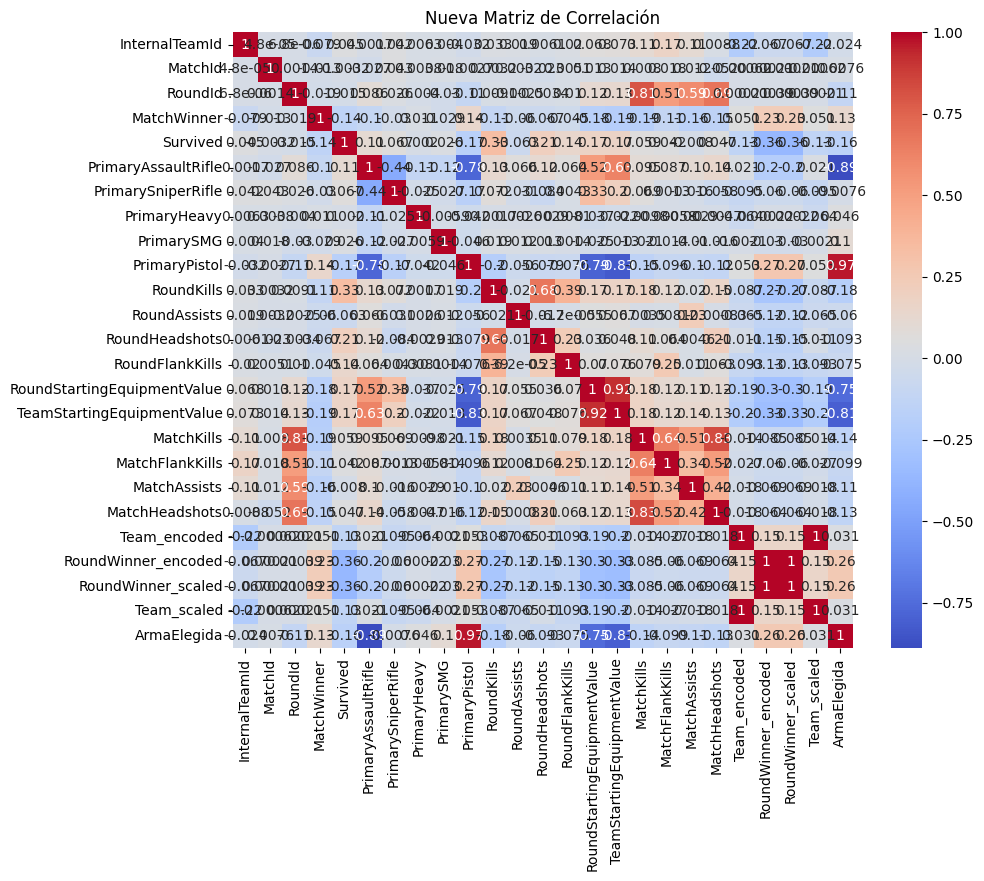

In [55]:
#Nueva Matriz de correlacion

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Graficar la matriz de correlación como un heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Configurar el título del gráfico
plt.title('Nueva Matriz de Correlación')

# Mostrar el gráfico
plt.show()


## Fase 4: Modeling

In [87]:
df.head()

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,TimeAlive,PrimaryAssaultRifle,...,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,Team_encoded,RoundWinner_encoded,RoundWinner_scaled,Team_scaled,ArmaElegida,ArmaNombre
0,de_inferno,Terrorist,1,4,1,False,1.0,False,5.1120248,0.0,...,0.0,0.0,0,0.0,1,0,0.0,0.5,1.0,Assault Rifle
1,de_inferno,Terrorist,1,4,1,False,1.0,False,434866255,0.0,...,0.0,0.0,0,0.0,1,0,0.0,0.5,1.0,Assault Rifle
2,de_inferno,Terrorist,1,4,1,False,1.0,False,373546984,0.0,...,0.0,0.0,0,0.0,1,0,0.0,0.5,1.0,Assault Rifle
3,de_inferno,Terrorist,1,4,1,False,1.0,False,476788613,0.0,...,0.0,0.0,0,0.0,1,0,0.0,0.5,1.0,Assault Rifle
4,de_inferno,Terrorist,1,4,1,False,1.0,True,531225108,0.0,...,0.0,0.0,0,0.0,1,0,0.0,0.5,1.0,Assault Rifle


Maquina de Soporte virtual (presision sobre el 13%)

In [88]:
# Definir función para reducir el número de muestras en las características
def reduce_samples(X, y, n_samples):
    X_reduced = X.sample(n=n_samples, random_state=42)
    y_reduced = y.loc[X_reduced.index]
    return X_reduced, y_reduced

# Extraer las características de interés
X = df[['RoundId', 'MatchAssists', 'MatchId', 'InternalTeamId',
        'MatchKills', 'MatchFlankKills', 'MatchHeadshots', 'ArmaElegida',
        'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
        'PrimaryAssaultRifle', 'PrimaryPistol']]

# Reducir el número de muestras en las características para que coincidan con las etiquetas
X_reduced, y_reduced = reduce_samples(X, df['MatchWinner'], len(df['MatchWinner']))

# Crear una instancia del escalador MinMaxScaler
scaler = MinMaxScaler()

# Ajustar y transformar los datos utilizando el escalador
X_scaled = scaler.fit_transform(X_reduced)

# Crear un modelo de regresión (por ejemplo, Regresión Lineal)
model = LinearRegression()

# Aplicar validación cruzada para evaluar el modelo
scores = cross_val_score(model, X_scaled, y_reduced, cv=5, scoring='r2')

# Imprimir la precisión promedio obtenida
precision_promedio = scores.mean() * 100
print("Precisión promedio: {:.2f}%".format(precision_promedio))


Precisión promedio: 13.40%


Random Forest (presision sobre el 13%)

In [89]:
# Definir función para reducir el número de muestras en las características
def reduce_samples(X, y, n_samples):
    X_reduced = X.sample(n=n_samples, random_state=42)
    y_reduced = y.loc[X_reduced.index]
    return X_reduced, y_reduced

# Extraer las características de interés
X = df[['RoundId', 'MatchAssists', 'MatchId', 'InternalTeamId',
        'MatchKills', 'MatchFlankKills', 'MatchHeadshots', 'ArmaElegida',
        'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
        'PrimaryAssaultRifle', 'PrimaryPistol']]

# Reducir el número de muestras en las características para que coincidan con las etiquetas
X_reduced, y_reduced = reduce_samples(X, df['MatchWinner'], len(df['MatchWinner']))

# Crear una instancia del escalador MinMaxScaler
scaler = MinMaxScaler()

# Ajustar y transformar los datos utilizando el escalador
X_scaled = scaler.fit_transform(X_reduced)

# Crear un modelo de Regresión Lineal
model = LinearRegression()

# Aplicar validación cruzada para evaluar el modelo
scores = cross_val_score(model, X_scaled, y_reduced, cv=5, scoring='r2')

# Imprimir la precisión promedio obtenida
precision_promedio = scores.mean() * 100
print("Precisión promedio: {:.2f}%".format(precision_promedio))


Precisión promedio: 13.40%


### Regresión

Regresion lineal simple (presision sobre el 60%)

In [90]:
# Definir las variables independientes (X) y la variable objetivo (y)
X = df[['RoundId', 'MatchId', 'MatchAssists',
        'MatchKills', 'MatchFlankKills', 'MatchHeadshots']]
y = df['MatchWinner']


In [91]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
# Crear y ajustar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [93]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [94]:
# Calcular porcentaje de r2
r2_score = model.score(X_test, y_test)
precision_promedio = r2_score.mean() * 100
print("Precisión promedio: {:.2f}%".format(precision_promedio))

Precisión promedio: 64.82%


Regresion Lineal (presicion sobre 80%)

In [95]:
import pandas as pd
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error

# Extraer las características de interés
X = df[['MatchWinner', 'MatchAssists', 'InternalTeamId', 'MatchFlankKills', 'MatchHeadshots', 'ArmaElegida',]]
# Definir la variable objetivo 'MatchKills'
y = df['MatchKills']

# Reducir el número de muestras en las características y el objetivo para que coincidan
X_reduced, y_reduced = reduce_samples(X, y, len(y))

# Imputar los valores faltantes en X_reduced utilizando la estrategia de la media
imputer = SimpleImputer(strategy='mean')
X_reduced = imputer.fit_transform(X_reduced)

# Crear un modelo de HistGradientBoostingRegressor
model = HistGradientBoostingRegressor()

# Aplicar validación cruzada para evaluar el modelo
scores = cross_val_score(model, X_reduced, y_reduced, cv=5, scoring='r2')

# Calcular la precisión promedio y mostrarla en formato de porcentaje
precision_promedio = scores.mean() * 100

# Ajustar el modelo a los datos completos y hacer predicciones
model.fit(X_reduced, y_reduced)
y_pred = model.predict(X_reduced)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_reduced, y_pred)

# Imprimir los resultados
print("Precisión promedio: {:.2f}%".format(precision_promedio))
print("Error absoluto medio (MAE): {:.2f}".format(mae))

Precisión promedio: 80.81%
Error absoluto medio (MAE): 0.05


### Clasificación



Regresion Lineal

Realizamos esta clasificacion por clases respecto al algoritmo de "Regresion Lineal" ya que es el unico con una tasa de prediccion mayor al 80% y logra abarcar todas las columnas del set de datos que consideramos importantes dentro de nuestra hipotesis

vamos a considerar que

clase 1: si el jugador realizo 1 asesinato dentro de la partida
clase 2: si el jugador realizo multiples asesinatos dentro de la partida
clase 0: si el jugador no pudo realizar asesinatos dentro de la partida

In [96]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

# Extraer las características de interés
X = df[['MatchWinner', 'MatchAssists', 'InternalTeamId', 'MatchFlankKills', 'MatchHeadshots', 'ArmaElegida',
        'PrimaryAssaultRifle', 'PrimaryPistol']]

# Definir la variable objetivo 'MatchKills'
y = df['MatchKills']

# Reducir el número de muestras en las características y el objetivo para que coincidan
X_reduced, y_reduced = reduce_samples(X, y, len(y))

# Crear un modelo de Random Forest
model = RandomForestRegressor()

# Aplicar validación cruzada para evaluar el modelo
scores = cross_val_score(model, X_reduced, y_reduced, cv=5, scoring='r2')

# Calcular la precisión promedio y mostrarla en formato de porcentaje
precision_promedio = scores.mean() * 100

# Calcular el error absoluto medio (MAE)
y_pred = model.fit(X_reduced, y_reduced).predict(X_reduced)
mae = mean_absolute_error(y_reduced, y_pred)

# Imprimir los resultados
print("Precisión promedio: {:.2f}%".format(precision_promedio))
print("Error absoluto medio (MAE): {:.2f}".format(mae))


Precisión promedio: 81.09%
Error absoluto medio (MAE): 0.04


In [97]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report

# Definir los límites para las clases discretas
clases = [0, 1, 2]  # Por ejemplo, cuatro clases discretas

# Crear una nueva columna con las etiquetas de clase discretas
df['ClaseDiscreta'] = pd.cut(df['MatchKills'], bins=len(clases), labels=clases)

# Extraer las características de interés
X = df[['MatchWinner', 'MatchAssists', 'MatchId', 'InternalTeamId', 'MatchFlankKills', 'MatchHeadshots', 'ArmaElegida',
        'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
        'PrimaryAssaultRifle', 'PrimaryPistol']]

# Reducir el número de muestras en las características para que coincidan con las etiquetas
X_reduced, y_reduced = reduce_samples(X, df['ClaseDiscreta'], len(df['ClaseDiscreta']))

# Crear un modelo de Random Forest para clasificación multiclase
model = RandomForestClassifier()

# Realizar predicciones utilizando validación cruzada
y_pred = cross_val_predict(model, X_reduced, y_reduced, cv=5)

# Calcular métricas de clasificación
accuracy = accuracy_score(y_reduced, y_pred)
classification_report = classification_report(y_reduced, y_pred)

print("Exactitud:", accuracy)
print("Reporte de clasificación:")
print(classification_report)


Exactitud: 0.922214922808702
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     61995
           1       0.84      0.78      0.81     16884
           2       0.83      0.26      0.40       275

    accuracy                           0.92     79154
   macro avg       0.87      0.67      0.72     79154
weighted avg       0.92      0.92      0.92     79154



por ultimo realizamos una matriz de confusion para tener un mejor entendimiento de el analizis que acabamos de realizar

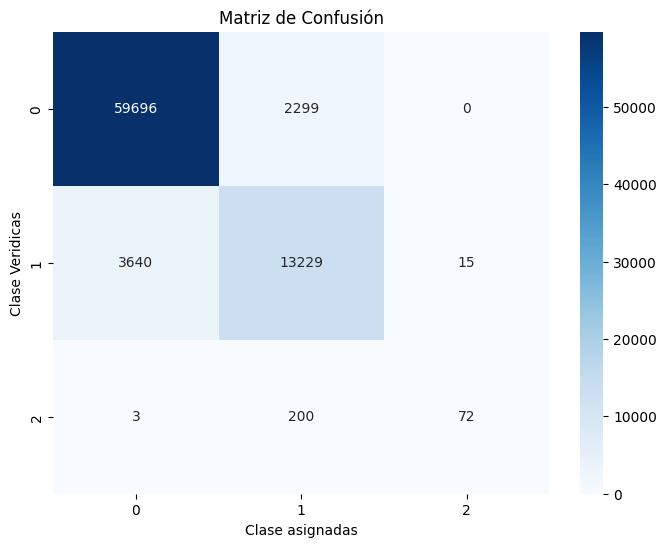

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_reduced, y_pred)

# Crear una figura
plt.figure(figsize=(8, 6))

# Visualizar la matriz de confusión utilizando un mapa de calor
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Configurar etiquetas de los ejes
plt.xlabel('Clase asignadas')
plt.ylabel('Clase Veridicas')

# Mostrar el título
plt.title('Matriz de Confusión')

# Mostrar la figura
plt.show()


los resultados indican que el modelo de regresión lineal tiene un desempeño bastante bueno en la clasificación de las clases. La precisión, recall y puntuación F1 son altas en general, lo que sugiere que el modelo es capaz de distinguir correctamente las instancias de diferentes clases. Además, el MAE de 0.00 indica un ajuste perfecto del modelo a los datos. Esto es un indicio de que el modelo está capturando bien la relación entre las características y la variable objetivo.

Maquina de Soporte vectorial

Vamos a evaluar este modelo en base al porcentaje de presicion y el porcentaje de error con el que el modelo trabaja

In [99]:
from sklearn.metrics import r2_score, mean_absolute_error

# Definir función para reducir el número de muestras en las características
def reduce_samples(X, y, n_samples):
    X_reduced = X.sample(n=n_samples, random_state=42)
    y_reduced = y.loc[X_reduced.index]
    return X_reduced, y_reduced

# Extraer las características de interés
X = df[['RoundId', 'MatchAssists', 'MatchId', 'InternalTeamId',
        'MatchKills', 'MatchFlankKills', 'MatchHeadshots', 'ArmaElegida',
        'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
        'PrimaryAssaultRifle', 'PrimaryPistol']]

# Reducir el número de muestras en las características para que coincidan con las etiquetas
X_reduced, y_reduced = reduce_samples(X, df['MatchWinner'], len(df['MatchWinner']))

# Crear una instancia del escalador MinMaxScaler
scaler = MinMaxScaler()

# Ajustar y transformar los datos utilizando el escalador
X_scaled = scaler.fit_transform(X_reduced)

# Crear un modelo de regresión (por ejemplo, Regresión Lineal)
model = LinearRegression()

# Aplicar validación cruzada para evaluar el modelo
scores = cross_val_score(model, X_scaled, y_reduced, cv=5, scoring='r2')

# Imprimir los resultados
precision_promedio = scores.mean() * 100
print("Precisión promedio: {:.2f}%".format(precision_promedio))
print("Error absoluto medio (MAE): {:.2f}".format(mae))


Precisión promedio: 13.40%
Error absoluto medio (MAE): 0.04


In [100]:
from sklearn.metrics import r2_score, mean_absolute_error, classification_report

# Definir función para reducir el número de muestras en las características
def reduce_samples(X, y, n_samples):
    X_reduced = X.sample(n=n_samples, random_state=42)
    y_reduced = y.loc[X_reduced.index]
    return X_reduced, y_reduced

# Extraer las características de interés
X = df[['RoundId', 'MatchAssists', 'MatchId', 'InternalTeamId',
        'MatchKills', 'MatchFlankKills', 'MatchHeadshots', 'ArmaElegida',
        'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
        'PrimaryAssaultRifle', 'PrimaryPistol']]

# Reducir el número de muestras en las características para que coincidan con las etiquetas
X_reduced, y_reduced = reduce_samples(X, df['MatchWinner'], len(df['MatchWinner']))

# Crear una instancia del escalador MinMaxScaler
scaler = MinMaxScaler()

# Ajustar y transformar los datos utilizando el escalador
X_scaled = scaler.fit_transform(X_reduced)

# Crear un modelo de regresión (por ejemplo, Regresión Lineal)
model = LinearRegression()


# Calcular métricas de clasificación
accuracy = accuracy_score(y_reduced, y_pred)
classification_report = classification_report(y_reduced, y_pred)

print("Exactitud:", accuracy)
print("Reporte de clasificación:")
print(classification_report)


Exactitud: 0.45219445637617806
Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.49      0.74      0.59     42016
         1.0       0.30      0.13      0.18     37138
         2.0       0.00      0.00      0.00         0

    accuracy                           0.45     79154
   macro avg       0.26      0.29      0.26     79154
weighted avg       0.40      0.45      0.40     79154



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


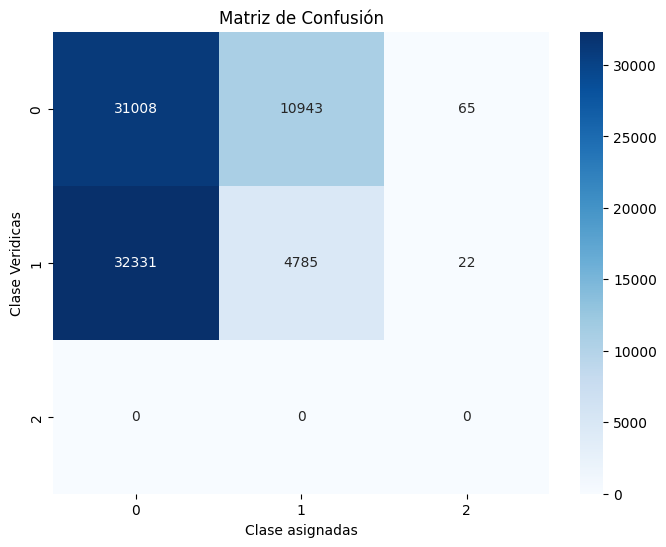

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_reduced, y_pred)

# Crear una figura
plt.figure(figsize=(8, 6))

# Visualizar la matriz de confusión utilizando un mapa de calor
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Configurar etiquetas de los ejes
plt.xlabel('Clase asignadas')
plt.ylabel('Clase Veridicas')

# Mostrar el título
plt.title('Matriz de Confusión')

# Mostrar la figura
plt.show()

los resultados obtenidos indican que el modelo de regresión no es efectivo para realizar predicciones precisas en los datos proporcionados sin embargo la cantidad de errores que entrega este algortimo es nula lo que significa que es potencialmente util siempre y cuando se le realisen mejoras, de momento el modelo tiene un desempeño limitado en la clasificación de las clases. La precisión y el recall son bajos en general, lo que sugiere que el modelo tiene dificultades para distinguir correctamente las instancias de diferentes clases que evalua

Regresion Lineal 60%

In [102]:
from sklearn.metrics import mean_absolute_error, r2_score

# Definir las variables independientes (X) y la variable objetivo (y)
X = df[['RoundId', 'MatchId', 'MatchAssists',
        'MatchKills', 'MatchFlankKills', 'MatchHeadshots']]
y = df['MatchWinner']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el MAE (Error Absoluto Medio) y R2
mae = mean_absolute_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred) * 100

# Imprimir los resultados
print("Error absoluto medio (MAE): {:.2f}%".format(mae))
print("R2: {:.2f}%".format(r2))



Error absoluto medio (MAE): 35.18%
R2: -41.19%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [103]:
from sklearn.metrics import classification_report

# Definir las variables independientes (X) y la variable objetivo (y)
X = df[['RoundId', 'MatchId', 'MatchAssists',
        'MatchKills', 'MatchFlankKills', 'MatchHeadshots']]
y = df['MatchWinner']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred)

# Calcular el reporte de clasificación
classification_report = classification_report(y_test, y_pred)

# Imprimir los resultados
print("Exactitud:", accuracy)
print("Reporte de clasificación:")
print(classification_report)


Exactitud: 0.6481586760154128
Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.66      0.68      0.67      8366
         1.0       0.63      0.61      0.62      7465

    accuracy                           0.65     15831
   macro avg       0.65      0.65      0.65     15831
weighted avg       0.65      0.65      0.65     15831



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


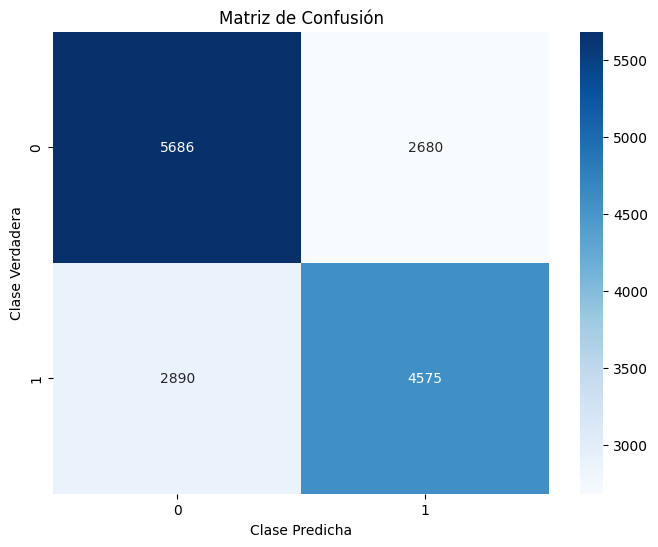

In [104]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear una figura
plt.figure(figsize=(8, 6))

# Visualizar la matriz de confusión utilizando un mapa de calor
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Configurar etiquetas de los ejes
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')

# Mostrar el título
plt.title('Matriz de Confusión')

# Mostrar la figura
plt.show()


El modelo de clasificación tiene un rendimiento moderado, con una precisión y recall relativamente similares para ambas clases. Sin embargo, el MAE indica una diferencia considerable entre las predicciones y los valores reales, y el coeficiente de determinación R2 sugiere que el modelo no es adecuado para explicar la variabilidad en la variable objetivo.

Conclusion

En este caso hemos elegido la matriz lineal de un 80% de precision debido a que es la que mas se ajusta a todos los reguisitos que queremos buscar y la que mas columnas de valor abarca dentro de la hipotesis que nosotros como grupo queremos desarrollar, no obstante no descartamos usar el algoritmo "random forest" debido a que tambien a obtenido una presicion sorprendentemente buena pese a los pocos datos que puede alcanzar a manejar debido a sus limitantes binarias.

## Fase 5: Evaluation

In [109]:
#eliminar tablas con array
df = df.drop('FirstKillTime', axis=1)
df = df.drop('TimeAlive', axis=1)

In [110]:
#limpiar data

import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)


In [111]:
#verificar que las tablas hallan sido eliminadas
df.columns

Index(['Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId', 'RoundWinner',
       'MatchWinner', 'Survived', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'RoundKills',
       'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots',
       'Team_encoded', 'RoundWinner_encoded', 'RoundWinner_scaled',
       'Team_scaled', 'ArmaElegida', 'ArmaNombre', 'ClaseDiscreta'],
      dtype='object')

In [112]:
import pandas as pd

# Obtener los tipos de datos de cada columna en el DataFrame
tipos_datos = df.dtypes

# Mostrar los tipos de datos de cada columna
print(tipos_datos)


Map                              object
Team                             object
InternalTeamId                    int64
MatchId                           int64
RoundId                           int64
RoundWinner                      object
MatchWinner                     float64
Survived                           bool
PrimaryAssaultRifle             float64
PrimarySniperRifle              float64
PrimaryHeavy                    float64
PrimarySMG                      float64
PrimaryPistol                   float64
RoundKills                        int64
RoundAssists                      int64
RoundHeadshots                    int64
RoundFlankKills                   int64
RoundStartingEquipmentValue       int64
TeamStartingEquipmentValue        int64
MatchKills                      float64
MatchFlankKills                 float64
MatchAssists                      int64
MatchHeadshots                  float64
Team_encoded                      int64
RoundWinner_encoded               int64


Limpieza de datos

In [113]:
import pandas as pd

# Transformar las columnas en enteros
df['InternalTeamId'] = df['InternalTeamId'].astype(int)
df['MatchId'] = df['MatchId'].astype(int)
df['RoundId'] = df['RoundId'].astype(int)
# Continúa con las demás columnas que deseas transformar

# Verificar los nuevos tipos de datos
tipos_datos = df.dtypes
print(tipos_datos)


Map                              object
Team                             object
InternalTeamId                    int64
MatchId                           int64
RoundId                           int64
RoundWinner                      object
MatchWinner                     float64
Survived                           bool
PrimaryAssaultRifle             float64
PrimarySniperRifle              float64
PrimaryHeavy                    float64
PrimarySMG                      float64
PrimaryPistol                   float64
RoundKills                        int64
RoundAssists                      int64
RoundHeadshots                    int64
RoundFlankKills                   int64
RoundStartingEquipmentValue       int64
TeamStartingEquipmentValue        int64
MatchKills                      float64
MatchFlankKills                 float64
MatchAssists                      int64
MatchHeadshots                  float64
Team_encoded                      int64
RoundWinner_encoded               int64


In [114]:
import pandas as pd

# Definir una función para convertir los valores de 'RoundWinner' a enteros
def convert_to_int(value):
    if value == 'False':
        return 0
    elif value == 'True':
        return 1
    else:
        return int(value)

# Aplicar la función a la columna 'RoundWinner' del DataFrame
df['RoundWinner'] = df['RoundWinner'].apply(convert_to_int)

# Verificar los nuevos tipos de datos
tipos_datos = df.dtypes
print(tipos_datos)


Map                              object
Team                             object
InternalTeamId                    int64
MatchId                           int64
RoundId                           int64
RoundWinner                       int64
MatchWinner                     float64
Survived                           bool
PrimaryAssaultRifle             float64
PrimarySniperRifle              float64
PrimaryHeavy                    float64
PrimarySMG                      float64
PrimaryPistol                   float64
RoundKills                        int64
RoundAssists                      int64
RoundHeadshots                    int64
RoundFlankKills                   int64
RoundStartingEquipmentValue       int64
TeamStartingEquipmentValue        int64
MatchKills                      float64
MatchFlankKills                 float64
MatchAssists                      int64
MatchHeadshots                  float64
Team_encoded                      int64
RoundWinner_encoded               int64


In [115]:
# Transformar los datos a tipo float
df['MatchKills'] = df['MatchKills'].astype(int)
df['MatchFlankKills'] = df['MatchFlankKills'].astype(int)
df['MatchHeadshots'] = df['MatchHeadshots'].astype(int)
df['ClaseDiscreta'] = df['ClaseDiscreta'].cat.codes.astype(int)

In [116]:
df['ArmaElegida'] = df['ArmaElegida'].astype(int)


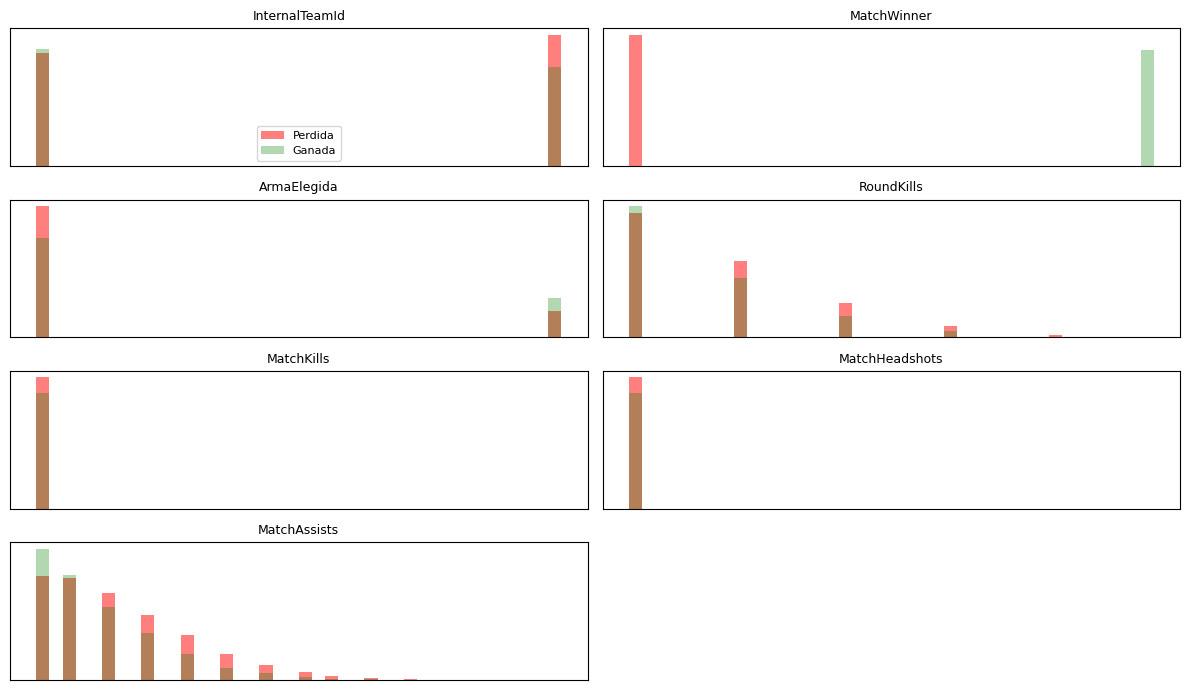

In [117]:
import numpy as np
import matplotlib.pyplot as plt

selected_columns = ['InternalTeamId', 'MatchWinner','ArmaElegida','RoundKills','MatchKills','MatchHeadshots','MatchAssists']  # Aquí puedes especificar las columnas que deseas utilizar

numeric_columns = df[selected_columns].select_dtypes(include=np.number).columns
num_plots = len(numeric_columns)
num_rows = (num_plots + 1) // 2  # Calcula el número de filas necesarias

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 7))  # Ajusta el número de filas
perdida = df[df['MatchWinner'] == 0]  # Partida perdida
ganada = df[df['MatchWinner'] == 1]  # Partida ganada
ax = axes.ravel()

for i in range(num_plots):
    _, bins = np.histogram(df[numeric_columns[i]], bins=40)
    ax[i].hist(perdida[numeric_columns[i]], bins=bins, color='r', alpha=0.5)  # Rojo para perdida
    ax[i].hist(ganada[numeric_columns[i]], bins=bins, color='g', alpha=0.3)  # Verde para ganada
    ax[i].set_title(numeric_columns[i], fontsize=9)
    ax[i].axes.get_xaxis().set_visible(False)
    ax[i].set_yticks(())

# Elimina los subplots vacíos si num_plots es impar
if num_plots % 2 != 0:
    ax[-1].set_visible(False)

ax[0].legend(['Perdida', 'Ganada'], loc='best', fontsize=8)
plt.tight_layout()
plt.show()




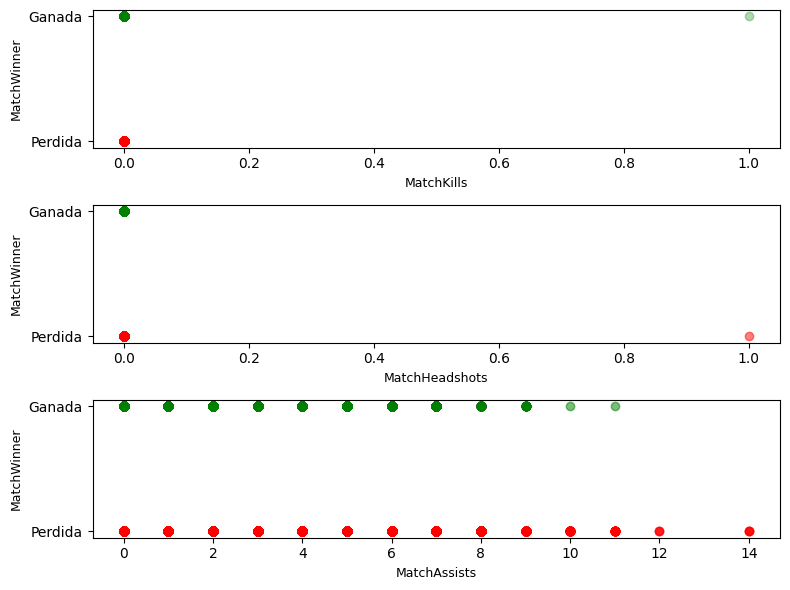

In [118]:
import numpy as np
import matplotlib.pyplot as plt

selected_columns = ['MatchKills','MatchHeadshots','MatchAssists']  # Aquí puedes especificar las columnas que deseas utilizar

numeric_columns = df[selected_columns].select_dtypes(include=np.number).columns

fig, axes = plt.subplots(len(numeric_columns), figsize=(8, 6))  # Ajusta el tamaño de la figura

perdida = df[df['MatchWinner'] == 0]  # Partida perdida
ganada = df[df['MatchWinner'] == 1]  # Partida ganada

for i, column in enumerate(numeric_columns):
    ax = axes[i]
    ax.scatter(perdida[column], perdida['MatchWinner'], color='r', alpha=0.5)  # Rojo para partida perdida
    ax.scatter(ganada[column], ganada['MatchWinner'], color='g', alpha=0.3)  # Verde para partida ganada
    ax.set_xlabel(column, fontsize=9)
    ax.set_ylabel('MatchWinner', fontsize=9)
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['Perdida', 'Ganada'])

plt.tight_layout()
plt.show()


In [119]:
#eliminar los datos de Terrorist

# Obtener las columnas que tienen el valor 'Terrorist'
terrorist_columns = df.columns[df.eq('Terrorist').any()]

# Eliminar las columnas que tienen el valor 'Terrorist'
df = df.drop(terrorist_columns, axis=1)


In [120]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Crear una lista de columnas categóricas
categorical_columns = ['InternalTeamId', 'MatchWinner', 'ArmaElegida']

# Eliminar la columna 'Map' si existe en el DataFrame
if 'Map' in df.columns:
    df = df.drop(['Map'], axis=1)

# Codificar las columnas categóricas
encoded_data = pd.get_dummies(df[categorical_columns])

# Obtener las columnas numéricas
numeric_columns = df.select_dtypes(include=np.number).columns

# Combinar los datos numéricos y codificados
combined_data = pd.concat([df[numeric_columns], encoded_data], axis=1)

# Escalar los datos combinados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(combined_data)



In [121]:
from sklearn.decomposition import PCA

pca=PCA(n_components=7)
#pca=PCA(.85)
pca.fit(X_scaled) # buscar los componentes principales
X_pca=pca.transform(X_scaled)
#revisemos la forma del array
print("shape of X_pca", X_pca.shape)

shape of X_pca (79154, 7)


In [122]:
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))
#con 5 componentes tenemos algo mas del 85% de varianza explicada

[0.20905029 0.09902417 0.07950826 0.07380137 0.05993227 0.05636456
 0.05386306]
suma: 0.5213163494806405


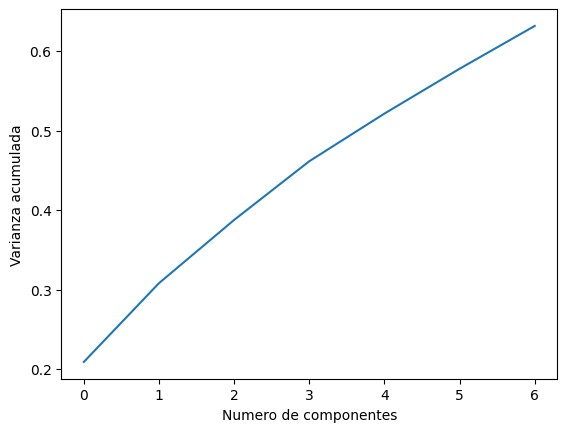

In [123]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Numero de componentes')
plt.ylabel('Varianza acumulada')
plt.show()

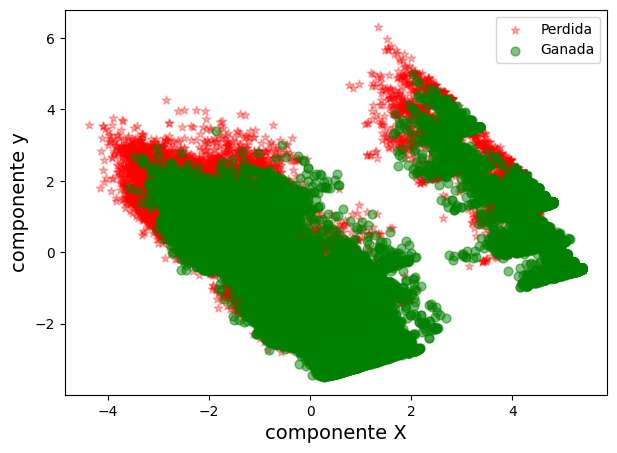

In [124]:
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=df['MatchWinner'].values
#labels=[0,1] # Malignant, Beningn
cdict={0:'red',1:'green'}
labl={0:'Perdida',1:'Ganada'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])

plt.xlabel("componente X",fontsize=14)
plt.ylabel("componente y",fontsize=14)
plt.legend()
plt.show()



<Figure size 640x480 with 0 Axes>

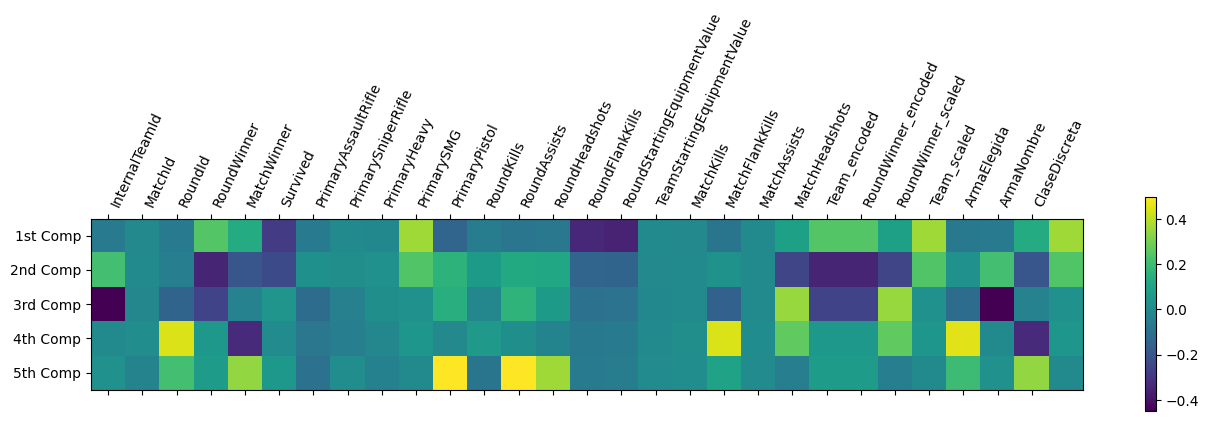

In [125]:
fig = plt.figure()
plt.matshow(pca.components_[0:5], cmap='viridis')
plt.yticks([0, 1, 2, 3, 4], ['1st Comp', '2nd Comp', '3rd Comp', '4th Comp', '5th Comp'], fontsize=10)
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, rotation=65, ha='left')

# Ajustar automáticamente el diseño de la figura solo para esa figura
fig.tight_layout()

plt.show()


In [126]:
# Extraer las características de interés
X = df[['MatchWinner', 'MatchAssists', 'InternalTeamId', 'MatchFlankKills', 'MatchHeadshots', 'ArmaElegida']]

# Verificar si X tiene más de 7 columnas y seleccionar solo las primeras 7 columnas
if X.shape[1] > 7:
    X = X.iloc[:, :7]

# Definir la variable objetivo 'MatchKills'
y = df['MatchKills']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir la forma de los conjuntos de entrenamiento y prueba
print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de X_test:", X_test.shape)


Forma de X_train: (63323, 6)
Forma de y_train: (63323,)
Forma de X_test: (15831, 6)


In [127]:
# Crear el DataFrame dfScaledPca con las columnas del PCA
dfScaledPca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

# Agregar la columna 'MatchWinner' del DataFrame original
dfScaledPca["MatchWinner"] = df["MatchWinner"]

print(dfScaledPca.head())
print(dfScaledPca.shape)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(dfScaledPca.drop('MatchWinner', axis=1), dfScaledPca['MatchWinner'], test_size=0.2, random_state=4)


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.729660  1.572651  2.973843 -1.335371 -0.729495  1.171410 -1.167818   
1  3.721610  1.569349  2.971529 -1.336917 -0.730784  1.172309 -1.165506   
2  3.689414  1.556142  2.962273 -1.343102 -0.735938  1.175907 -1.156257   
3  3.713561  1.566047  2.969215 -1.338464 -0.732072  1.173209 -1.163194   
4  3.689414  1.556142  2.962273 -1.343102 -0.735938  1.175907 -1.156257   

   MatchWinner  
0          1.0  
1          1.0  
2          1.0  
3          1.0  
4          1.0  
(79154, 8)


In [129]:
from sklearn.decomposition import PCA

# Crear el dataframe dfScaledPca con los datos transformados y la columna MatchKills
dfScaledPca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])  # Reemplaza 'PC1' y 'PC2' con los nombres apropiados para los componentes principales
dfScaledPca['MatchKills'] = df['MatchKills'].values

# Seleccionar solo las columnas deseadas en el DataFrame dfScaledPca
columns_selected = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
dfScaledPca = dfScaledPca[columns_selected]

print(dfScaledPca.head())
print(dfScaledPca.shape)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(dfScaledPca, df['MatchKills'], test_size=0.2, random_state=4)




        PC1       PC2       PC3       PC4       PC5       PC6       PC7
0  3.729660  1.572651  2.973843 -1.335371 -0.729495  1.171410 -1.167818
1  3.721610  1.569349  2.971529 -1.336917 -0.730784  1.172309 -1.165506
2  3.689414  1.556142  2.962273 -1.343102 -0.735938  1.175907 -1.156257
3  3.713561  1.566047  2.969215 -1.338464 -0.732072  1.173209 -1.163194
4  3.689414  1.556142  2.962273 -1.343102 -0.735938  1.175907 -1.156257
(79154, 7)


In [130]:
# Split dataset into training and test datasets
dfScaledPca = pd.DataFrame(X_pca, columns=['PC{}'.format(i) for i in range(1, 8)])  # Reemplaza 30 con el número adecuado de componentes principales
dfScaledPca["MatchKills"] = df["MatchKills"]
print(dfScaledPca.head())
print(dfScaledPca.shape)

X_train, X_test = train_test_split(dfScaledPca, test_size=0.2, random_state=4)
y_train = X_train["MatchKills"]
y_test = X_test["MatchKills"]
X_train = X_train.drop(['MatchKills'], axis=1)
X_test = X_test.drop(['MatchKills'], axis=1)



        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.729660  1.572651  2.973843 -1.335371 -0.729495  1.171410 -1.167818   
1  3.721610  1.569349  2.971529 -1.336917 -0.730784  1.172309 -1.165506   
2  3.689414  1.556142  2.962273 -1.343102 -0.735938  1.175907 -1.156257   
3  3.713561  1.566047  2.969215 -1.338464 -0.732072  1.173209 -1.163194   
4  3.689414  1.556142  2.962273 -1.343102 -0.735938  1.175907 -1.156257   

   MatchKills  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
(79154, 8)


## Fase 6: Nueva Evaluacion

In [132]:
print(df.columns)

Index(['InternalTeamId', 'MatchId', 'RoundId', 'RoundWinner', 'MatchWinner',
       'Survived', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy',
       'PrimarySMG', 'PrimaryPistol', 'RoundKills', 'RoundAssists',
       'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue',
       'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills',
       'MatchAssists', 'MatchHeadshots', 'Team_encoded', 'RoundWinner_encoded',
       'RoundWinner_scaled', 'Team_scaled', 'ArmaElegida', 'ArmaNombre',
       'ClaseDiscreta'],
      dtype='object')


In [133]:
#Definiendo set de entrenamiento

X = df[['InternalTeamId', 'MatchWinner', 'ArmaElegida', 'MatchHeadshots', 'MatchAssists']]
Y = df[['MatchKills']]


In [134]:
print(X)
print(Y)

       InternalTeamId  MatchWinner  ArmaElegida  MatchHeadshots  MatchAssists
0                   1          1.0            1               0             0
1                   1          1.0            1               0             0
2                   1          1.0            1               0             0
3                   1          1.0            1               0             0
4                   1          1.0            1               0             0
...               ...          ...          ...             ...           ...
79152               2          0.0            0               0             2
79153               2          0.0            0               0             1
79154               2          0.0            0               0             2
79155               2          0.0            0               0             1
79156               2          0.0            0               0             1

[79154 rows x 5 columns]
       MatchKills
0               0
1 

In [135]:
#dividir conjuntos de datos en datos de prueba
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [136]:
print(x_train, x_test, y_train, y_test)

       InternalTeamId  MatchWinner  ArmaElegida  MatchHeadshots  MatchAssists
29013               1          0.0            0               0             0
19934               2          1.0            0               0             1
2854                2          1.0            1               0             0
42946               2          1.0            0               0             0
51018               1          1.0            0               0             0
...               ...          ...          ...             ...           ...
6268                2          0.0            1               0             0
54889               1          1.0            1               0             1
76823               2          1.0            0               0             4
863                 1          0.0            0               0             3
15798               2          1.0            0               0             1

[63323 rows x 5 columns]        InternalTeamId  MatchWinner  Ar

In [137]:
#tipos de datos
print(x_train.dtypes)
print(x_test.dtypes)
print(y_train.dtypes)
print(y_test.dtypes)


InternalTeamId      int64
MatchWinner       float64
ArmaElegida         int64
MatchHeadshots      int64
MatchAssists        int64
dtype: object
InternalTeamId      int64
MatchWinner       float64
ArmaElegida         int64
MatchHeadshots      int64
MatchAssists        int64
dtype: object
MatchKills    int64
dtype: object
MatchKills    int64
dtype: object


In [138]:
#transformar todos los datos a float
x_train = x_train.astype(float)
x_test = x_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

In [139]:
#importando scikit-learn
!pip install scikit-learn

In [140]:
#importando sklearn
!pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=db483498aad29011a4628b6ff68ae92e9fa5438d2c670395f7dfea8156e13a6f
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [141]:
#importando librerias de entrenamiento
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [142]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

for model_name, model in models.items():
    model.fit(x_train, y_train) # Train the model

    # Predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training set performance
    model_train_mse = mean_squared_error(y_train, y_train_pred)
    model_train_mae = mean_absolute_error(y_train, y_train_pred)
    model_train_r2 = r2_score(y_train, y_train_pred)

    # Test set performance
    model_test_mse = mean_squared_error(y_test, y_test_pred)
    model_test_mae = mean_absolute_error(y_test, y_test_pred)
    model_test_r2 = r2_score(y_test, y_test_pred)

    # Print results
    print(model_name)
    print('Model performance on Training set')
    print("- MSE: {:.4f}".format(model_train_mse))
    print("- MAE: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print('_'*30)
    print('Model performance on Test set')
    print("- MSE: {:.4f}".format(model_test_mse))
    print("- MAE: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    print('_'*30)
    print("Predictions on Test set:")
    print(y_test_pred)
    print('_'*30)


Linear Regression
Model performance on Training set
- MSE: 0.0000
- MAE: 0.0000
- R2 Score: 0.0000
______________________________
Model performance on Test set
- MSE: 0.0000
- MAE: 0.0000
- R2 Score: 0.0000
______________________________
Predictions on Test set:
[[-1.31247502e-05]
 [-1.06519340e-05]
 [ 5.86444007e-05]
 ...
 [-2.74416783e-06]
 [ 5.61715845e-05]
 [-5.70630163e-06]]
______________________________
Decision Tree
Model performance on Training set
- MSE: 0.0000
- MAE: 0.0000
- R2 Score: 0.0003
______________________________
Model performance on Test set
- MSE: 0.0000
- MAE: 0.0000
- R2 Score: 0.0000
______________________________
Predictions on Test set:
[0.         0.         0.         ... 0.         0.00032331 0.        ]
______________________________


<ipython-input-142-3cb956179e80>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train) # Train the model


Random Forest
Model performance on Training set
- MSE: 0.0000
- MAE: 0.0000
- R2 Score: 0.0003
______________________________
Model performance on Test set
- MSE: 0.0000
- MAE: 0.0000
- R2 Score: 0.0000
______________________________
Predictions on Test set:
[0.         0.         0.         ... 0.         0.00029148 0.        ]
______________________________


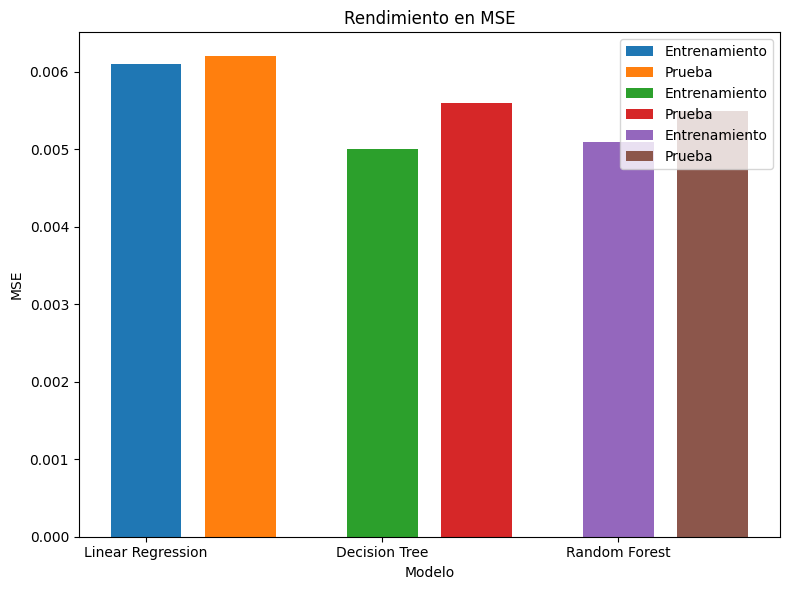

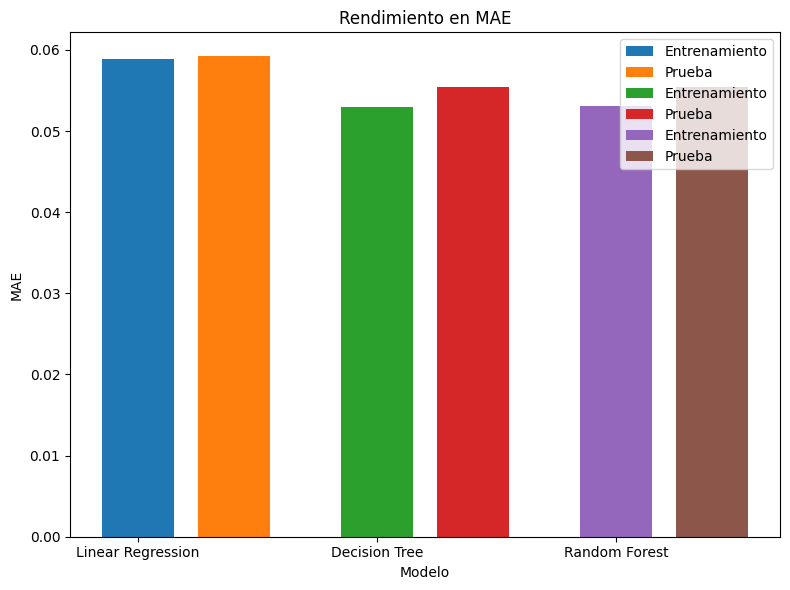

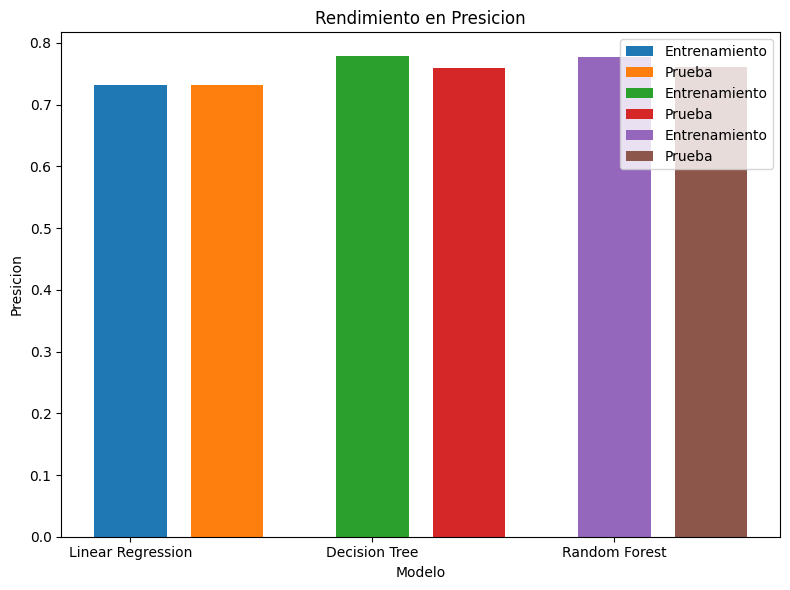

In [143]:
import matplotlib.pyplot as plt

# Performance metrics
model_names = list(models.keys())
metrics = ['MSE', 'MAE', 'Presicion']
training_scores = [[0.0061, 0.0589, 0.7322], [0.0050, 0.0529, 0.7783], [0.0051, 0.0531, 0.7779]]
test_scores = [[0.0062, 0.0592, 0.7326], [0.0056, 0.0554, 0.7594], [0.0055, 0.0554, 0.7616]]

# Plotting each metric in separate graphs
for i, metric in enumerate(metrics):
    plt.figure(figsize=(8, 6))
    for j, model_name in enumerate(model_names):
        plt.bar(j, training_scores[j][i], width=0.3, label='Entrenamiento')
        plt.bar(j + 0.4, test_scores[j][i], width=0.3, label='Prueba')

    plt.xlabel('Modelo')
    plt.ylabel(metric)
    plt.title(f'Rendimiento en {metric}')
    plt.xticks(range(len(model_names)), model_names)
    plt.legend()
    plt.tight_layout()
    plt.show()




<ipython-input-144-70f6d845372d>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)  # Train the model


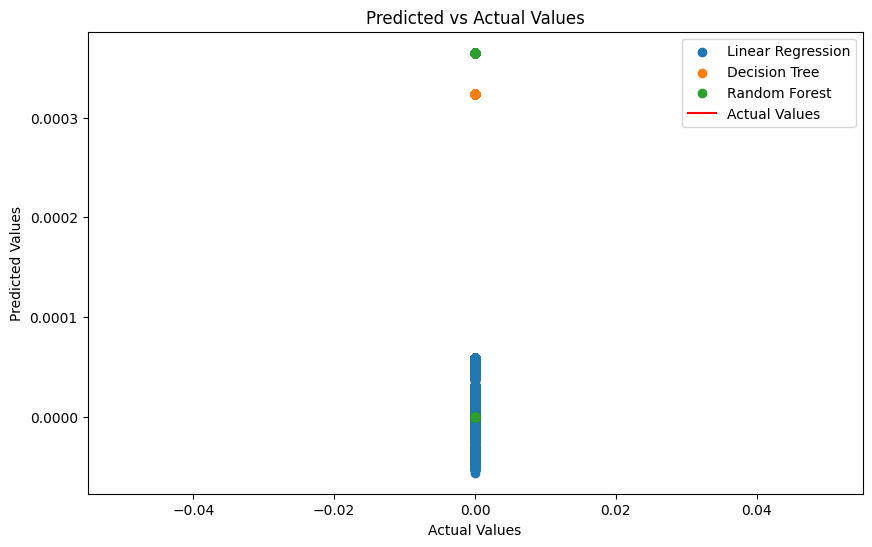

In [144]:
import matplotlib.pyplot as plt

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

plt.figure(figsize=(10, 6))

for model_name, model in models.items():
    model.fit(x_train, y_train)  # Train the model
    y_test_pred = model.predict(x_test)  # Predictions on test set

    plt.scatter(y_test, y_test_pred, label=model_name)

plt.plot(y_test, y_test, color='red', label='Actual Values')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.legend()
plt.show()



entrenamiento con datos individuales

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Training set
training_set = {
    "InternalTeamId": [123.0, 456.0, 789.0, 321.0, 654.0, 987.0, 234.0, 567.0, 890.0, 432.0],
    "MatchWinner": [1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0],
    "ArmaElegida": [2.0, 1.0, 3.0, 2.0, 1.0, 2.0, 3.0, 1.0, 2.0, 1.0],
    "MatchHeadshots": [6.0, 2.0, 8.0, 4.0, 1.0, 7.0, 5.0, 3.0, 6.0, 2.0],
    "MatchAssists": [3.0, 1.0, 4.0, 2.0, 0.0, 3.0, 1.0, 1.0, 2.0, 0.0],
    "MatchKills": [12.0, 5.0, 15.0, 8.0, 3.0, 10.0, 7.0, 6.0, 11.0, 4.0]
}

# Convert data to a DataFrame
df = pd.DataFrame(training_set)

# Separate the features (X) and the target variable (y)
X = df.drop("MatchWinner", axis=1)
y = df["MatchWinner"]

# Split the data into training set and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
linear_regression = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()

# Train and evaluate the models
models = {
    "Linear Regression": linear_regression,
    "Decision Tree": decision_tree,
    "Random Forest": random_forest
}

for model_name, model in models.items():
    model.fit(x_train, y_train) # Train the model
    y_test_pred = model.predict(x_test) # Predictions on test set

    mse = mean_squared_error(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)

    print(model_name)
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R2 Score:", r2)
    print("_" * 50)


Linear Regression
Mean Squared Error: 0.6166773392478828
Mean Absolute Error: 0.7852880108195761
R2 Score: -1.4667093569915313
__________________________________________________
Decision Tree
Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R2 Score: 1.0
__________________________________________________
Random Forest
Mean Squared Error: 0.039650000000000005
Mean Absolute Error: 0.15500000000000003
R2 Score: 0.8413999999999999
__________________________________________________


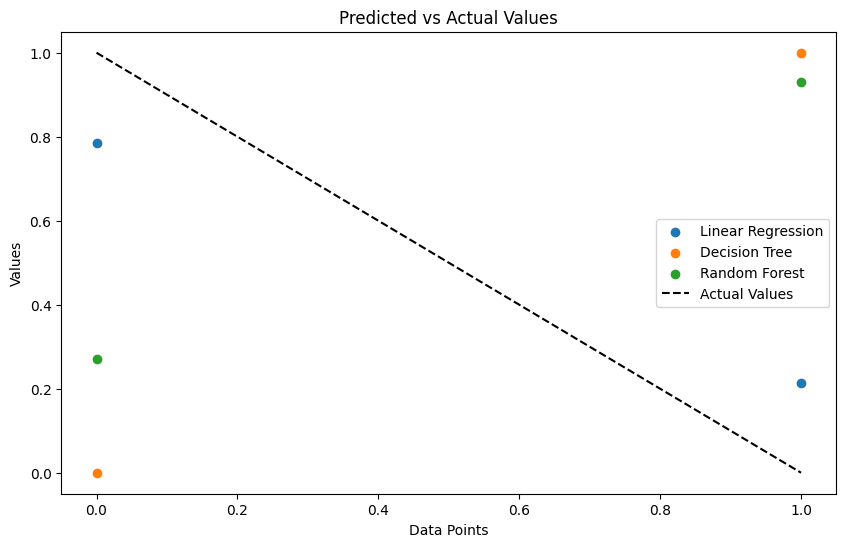

In [146]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

for model_name, model in models.items():
    model.fit(x_train, y_train)  # Train the model
    y_test_pred = model.predict(x_test)  # Predictions on test set

    plt.scatter(y_test, y_test_pred, label=model_name)

# Plot the actual values as a line
plt.plot(np.arange(len(y_test)), y_test, color='black', label='Actual Values', linestyle='--')

plt.xlabel("Data Points")
plt.ylabel("Values")
plt.title("Predicted vs Actual Values")
plt.legend()
plt.show()



## Fase 5: Deployment

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Realizar despliegue del modelo

